# **Proyecto Minería de Datos**


**Integrantes:** Pablo Apablaza, Pía Contreras, Luca Leporati, Daniel Maniega, Matías Osses.


##**Introducción - Descripción del problema**

La pandemia causada por el COVID-19 ha impactado de forma repentina y con gran fuerza a las personas de todo el mundo, no solamente por la cantidad de enfermos y muertes, sino también por la forma en que ha cambiado repentinamente el desarrollo de las relaciones humanas. Por el momento, la única medida efectiva existente para paliar los efectos de la monumental crisis en el sistema sanitario, es el distanciamiento social, lo que ha hecho que autoridades de todos los países tomen medidas de aislamiento inéditas.

La situación es aún más singular, pues con el preponderante régimen de globalización en el que nos encontramos inmersos, las relaciones humanas se han canalizado fuertemente por las redes sociales, donde el flujo de información ha aumentado considerablemente dando cuenta de la necesidad del ser humano de interacción con otros.

Este mundo virtual, entendido entonces como una extensión de la realidad de los usuarios que permite la interacción con el allá afuera, es una herramienta muy poderosa que entrega información de lo que aquellos usuarios piensan, viven o sienten. Es por esto que resulta interesante poder analizar lo que expresa la gente en diferentes lugares del mundo durante tiempos de pandemia por redes sociales. 

Una de las formas existentes para el intercambio virtual en redes sociales es el microblogging, que se refiere a la publicación de contenidos en la web en formato de mensajes cortos y concisos. Estas plataformas son bastante interesantes pues generan un desafío en el usuario de transmitir su opinión en muy pocas palabras, lo cual concluye en mensajes directos, enfocados exclusivamente a lo que se quiere decir, sin rodeos ni adornos. 
Esta naturaleza del microblogging facilita enormemente un análisis de su información contenida, lo cual entrega a su vez información de los fenómenos sociales que ocurren en el mundo. En este sector, uno de los líderes a nivel mundial es Twitter.

Por todo lo anterior, se buscará a partir del uso de herramientas de minería de datos caracterizar/predecir patrones de sentimientos en los tweets emitidos por los usuarios de twitter de habla hispana que tratan principalmente acerca de la pandemia del coronavirus. 






##**Temática - Objetivos e hipótesis**

El objetivo del proyecto con relación al curso es la obtención de experiencia en el manejo de diferentes técnicas, métodos y algoritmos relativos a la Minería de Datos, que permitirán aprender a recabar información implícita a partir de datasets de cualquier tipo. Una habilidad relevante y distintiva en la formación profesional del área de la Ingeniería.

Más puntualmente, el objetivo del análisis en sí, se enmarca en el deseo de  revelar el efecto que ha tenido esta pandemia sobre la sociedad, encontrando vínculos entre la esfera emocional de los ciudadanos y el desarrollo de la misma.

Se buscará a partir del uso de herramientas de minería de datos analizar patrones de sentimientos en tweets emitidos por usuarios de habla hispana que tratan acerca del coronavirus. La pregunta en concreto que lleva a este análisis es ¿Cómo se vincula la esfera emocional de los ciudadanos con el  contexto actual de pandemia? o de una forma más simple ¿Qué hace sentir el coronavirus?.

Para esto, se utilizará un método de análisis de sentimientos. El análisis de sentimientos en la minería de datos busca clasificar textos, sobre una determinada entidad y sus diferentes aspectos desde el lenguaje natural de los mismos. Esto se realiza de manera automática utilizando algoritmos para clasificación. Las opiniones son clasificadas según el sentimiento que transmiten como positivas, negativas o neutras. Eventualmente sería deseable profundizar más el nivel de análisis en sentimientos más específicos lo que significaría un algoritmo de clasificación multiclase. 

Se esperan encontrar diversas reacciones dependiendo del país en que se emitan los comentarios, entendiendo que el avance del virus no ha sido simultáneo y las diferentes culturas no tienen porqué reaccionar de la misma manera. Esto servirá como un acercamiento a entender la esfera emocional de las distintas naciones y su evolución. Se intuye que la preocupación y los sentimientos negativos sobretodo predominarán en lo que respecta al virus.

Además, se busca dilucidar cómo se caracterizan las distintas temáticas que han salido a flote en la discusión virtual y cómo son percibidas por los usuarios a nivel de sentimientos. Lo anterior se ejemplifica en la interrogante ¿Cuáles son las distintas temáticas en que se clasifican los tweets analizados y qué sentimientos se asocian a cada temática? 

Esto se puede llevar a cabo mediante la implementación de clustering, una vez que ya se encuentre el sentimiento asociado a cada tweet. Este método se realizaría en base a la vectorización de los textos de los tweets para encontrar “regiones” de agrupación y analizar cada cluster para determinar alguna temática que tenga en común.

Acerca de este punto, se cree que algunas de las temáticas posibles de identificar son temas relacionados con política, salud, cosas relativas al hogar, entre otras. Se espera encontrar diversas temáticas en los países y que las reacciones de emoción frente a las mismas varíen en cada lugar, pues creemos que el contexto nacional juega un papel trascendental sobre qué temas están en la contingencia y qué se opina (o siente) sobre ellos. 

Ambas interrogantes pretenden ser desmenuzadas apoyando el análisis realizado en cada país con diferentes clasificaciones adicionales, como tipos de usuarios, cantidad de retweets, cuentas con más seguidores, fechas de creación de las cuentas,  etc.







##**Descripción general del dataset**



El dataset original recopilado contiene todos los tweets (en todos los idiomas) posteados entre el 01 de marzo de 2020 y el 15 de abril de 2020 que contienen los hastags #coronavirus, #coronavirusoutbreak, #coronavirusPandemic, #covid19, #covid_19, #epitwitter y #ihavecorona. 

Debido al excesivo peso y dimensiones, el dataset se redujo para contener solo los tweets en idioma inglés.

El dataset reducido tiene 22 columnas y  filas. 

In [ ]:
#Instalar Librerias
!pip install -U gensim
!pip install pyldavis
!pip install -U -q PyDrive

In [ ]:
#Importar librerias matemáticas
import io
import random
import string
import warnings
import numpy as np 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Importar libreria Spacy
import spacy
spacy.load('en')
from spacy.lang.en import English

#Importar natural languaje toolkit
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import wordnet as wn

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))

#Análisis de sentimiento
from textblob import TextBlob

# Importar sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Importaciones de python
import re
import json
from collections import Counter
import glob
import os
from glob import iglob

#Importar Genism

import gensim
import pickle
from gensim import corpora
import pyLDAvis.gensim

#Herramientas de visualizacion
from matplotlib import pyplot as pyplot
import seaborn as sns 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import plotly.graph_objs as go

# Código para leer el archivo csv en Google Colaboratory:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

warnings.filterwarnings('ignore')
print("**Librerias Cargadas**")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
**Librerias Cargadas**


In [ ]:
# Autenticación y creación del cliente en PyDrive.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#Acceder al dataset
link= "https://drive.google.com/open?id=11fj1dj0xheEg3d3jvGnwhCRJY2iw1Cw5"
fluff, id=link.split('=')
filename="tweets_corona_en"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(filename+'.csv')       
tweets_df_en = pd.read_csv(filename+'.csv',index_col=0)                             
print('**Dataset leido y cargado**')

**Dataset leido y cargado**


Para trabajar se eligió una muestra de 200.000 tweets aleatorios dentro de los 6.000.000 tweets.

In [ ]:
df=tweets_df_en
print(df['created_at'].head(20))

5748998     2020-03-26T04:41:38Z
2599055     2020-03-18T11:48:21Z
11362402    2020-04-15T01:11:51Z
6480105     2020-03-27T21:47:44Z
2655105     2020-03-18T14:57:32Z
4151877     2020-03-22T03:31:18Z
2654414     2020-03-18T14:55:25Z
2222168     2020-03-17T15:10:00Z
403213      2020-03-12T07:43:07Z
6328049     2020-03-27T16:03:36Z
89809       2020-03-10T03:31:35Z
5292730     2020-03-25T03:15:01Z
3187503     2020-03-19T21:55:23Z
2723300     2020-03-18T21:51:32Z
2960847     2020-03-19T11:50:33Z
11085362    2020-04-13T22:08:08Z
1746202     2020-03-16T07:51:16Z
6952487     2020-03-29T12:10:29Z
7968463     2020-04-01T12:23:04Z
4187068     2020-03-22T06:32:50Z
Name: created_at, dtype: object


Cada fila tiene toda la información relativa a un tweet, como lo es el texto, usuario quien lo creó, fecha, idioma, lugar donde se twitteó, plataforma utilizada y otros parámetros de interés que serán útiles en el análsis de la información que estos entregan. Todos los atributos que contiene el dataset son presentados a continuación:

In [ ]:
#Información general del dataset: Filas y columnas
print("Columnas: "+str(df.shape[1]))
print("Filas: "+str(df.shape[0]))
print(df.head(10))
print(df.columns)

Columnas: 23
Filas: 200000
          Unnamed: 0.1            status_id  ...  verified lang
5748998         184104  1243035356502638593  ...     False   en
2599055         295791  1240243642008080385  ...     False   en
11362402         19954  1250230322911830016  ...      True   en
6480105         596435  1243655971722977281  ...     False   en
2655105         405519  1240291251850825729  ...     False   en
4151877          84882  1241568107744952320  ...     False   en
2654414         404219  1240290716796010497  ...     False   en
2222168         436386  1239931999680430081  ...      True   en
403213          100898  1238007601427865600  ...     False   en
6328049         332303  1243569368694431745  ...     False   en

[10 rows x 23 columns]
Index(['Unnamed: 0.1', 'status_id', 'user_id', 'created_at', 'screen_name',
       'text', 'source', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favourites_count',
       'retweet_count', '

###Pre-procesamiento de texto

Se utilizaron técnicas de limpieza de texto sobre los mensajes escritos por los usuarios. Para ello, se extrajo sólo la columna de texto del dataset y de ella se eliminaron los enlaces de los tweets, se pasó todo el texto a miníscula, se removieron los signos de puntuación, se eliminaron los saltos de línea, etc. Finalmente, se eliminaron las "stopwords" en inglés, puesto que son palabras estruturales como conectores y preposiciones que se encuentran en todos los tweets y no aportan información real sobre la temática del mensaje en particular.




In [ ]:
#Limpieza de caracteres del texto
text_df=df['text']                                                                                               #Extraer solo columna de texto
text_lr = text_df.apply(lambda x: re.sub(r"https\S+", "", x))                                                    #Eliminar enlaces del tweet
text_lr_lc = text_lr.apply(lambda x: x.lower())                                                                  #Pasar todo el texto a miniusculas
text_lr_lc_pr = text_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))               #Remover signos de puntuacion
text_lr_lc_pr_n=text_lr_lc_pr.replace(r'\n',  ' ', regex=True)                                                   #Eliminar saltos de linea \n
texto_limpio=text_lr_lc_pr_n                                                                                     #Variable "global" de texto limpio
del text_lr, text_lr_lc, text_lr_lc_pr, text_lr_lc_pr_n
#Eliminar stopwords de todos los textos
stop_words_en=set(stopwords.words('english'))  
stop_words_en.update(['si','q','va','aqui','asi','da','1','2','3','covid19','coronavirus','pandemia','virus','coronaviruspandemic','coronavid19','hoy','ser','así','solo','coronavirusespana',\
                      'coronavirusoutbreak','covid2019','coronaalert','total','coronaoutbreak','india','covid2019','amp','covid','due','dont','get','34','still','sarscov2','covidー19','it´s',\
                      'its','much','thats','one','4','pandemic','i’ll','don’t','can’t'])
sw=stop_words_en
texto_limpio_sw=texto_limpio.apply(lambda x: ' '.join([word for word in x.split() if word not in sw])) #Eliminar stopwords de los textos limpios
texto_limpio_sw.head()

5748998     even escape fucker lockdown tryna quarantine p...
2599055     scottmorrisonmp hey didn’t call week let’s see...
11362402    🖋 support laurel signing “support usps” delive...
6480105                     us cases passed 100000 covid19usa
2655105     president museveni uganda announces closure ed...
Name: text, dtype: object

##**Exploración inicial**


1) Los siguientes datos permiten caracterizar de manera inicial el texto de los tweets del dataset de manera de cersiorar que sea uno que contenga información interesante y no por ejemplo muchos tweets repetidos o muy pocas palabras en cada tweet.


* Del total de la muestra seleccionada de 200000 tweets de la base de datos, se tienen 195733 tweets únicos 

In [ ]:
tweets_unicos=pd.DataFrame(texto_limpio_sw.unique().tolist())
tweets_unicos.shape[0]
print("El número de tweets únicos es:", tweets_unicos.shape[0])

El número de tweets únicos es: 195733


* La suma total de palabras en los tweets únicos da 2864881 palabras.

In [ ]:
#Cambiandole nombre a la columna.
tweets_unicos.columns=["Tweets"]
#Obtención de la cantidad total de palabras en tweets únicos.
lista=texto_limpio_sw.unique().tolist()
numero_palabras=[len(sentence.split()) for sentence in lista]
print("El número total de palabras en tweets unicos es:",sum(numero_palabras))

El número total de palabras en tweets unicos es: 2864881



* Buscando las palabras únicas dentro del dataset con los tweets únicos, se obtuvo un total de 2977 palabras no repetidas.



In [ ]:
palabras = set()
for tweet in lista:
  palabras.update(tweet)
total = len(palabras)
print("El numero total de palabras únicas es:",total)

El numero total de palabras únicas es: 2977


2) Para un primer análisis sobre la temática general que se trata en los diversos tweets se realizó lo siguiente:

* Se eligieron 100 tweets aleatorios dentro del dataset original fijando una semilla, para que al correr el programa, siempre se obtuviese el mismo resultado. 



El numero total de palabras distintas es: 83
Cantidad de total de palabras: 1599


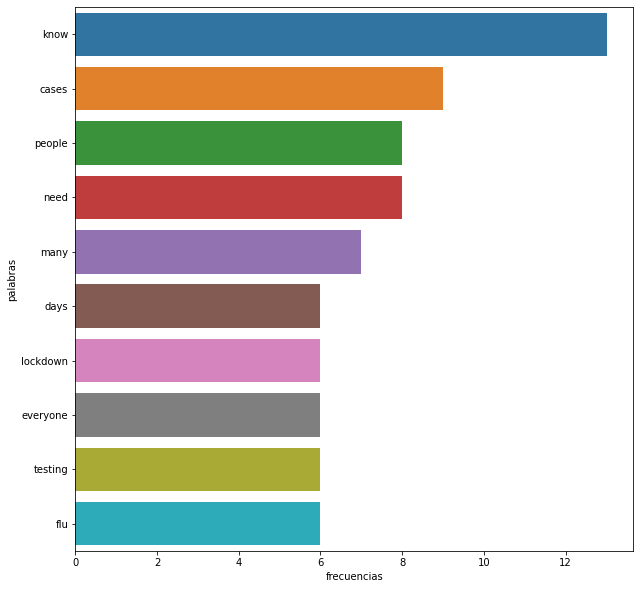

In [ ]:
random.seed(123) #fijando la semilla
lista=texto_limpio_sw.unique().tolist()
lista2 = lista[:] 
random.shuffle(lista2)
hasta_cien=lista2[:100]
numero_palabras_cien=[len(sentence.split()) for sentence in hasta_cien]
lista_palabras_cien=[palabra for linea in hasta_cien for palabra in linea.split()]    
contador_cien_comunes=Counter(lista_palabras_cien).most_common(10)
contador_cien_comunes_df = pd.DataFrame(contador_cien_comunes)
contador_cien_comunes_df.columns = ['palabras', 'frecuencias']
palabras_cien = set()
for tweet in hasta_cien:
  palabras_cien.update(tweet)
total_cien = len(palabras_cien)
print("El numero total de palabras distintas es:",total_cien)
print("Cantidad de total de palabras:", sum(numero_palabras_cien))
fig, ax = pyplot.subplots(figsize = (10, 10))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=contador_cien_comunes_df)

De estos 100 tweets, se puede observar que las 10 palabras más repetidas son: 'know', 'cases', 'people', 'need', 'many', 'days', 'lockdown', 'everyone', 'testing', 'flu' 

La cantidad total de palabras dentro de éstos 100 tweets es de 1599, mientras que la cantidad de palabras únicas es de 83.

* Luego se eligieron 1000 tweets aleatorios dentro del dataset original fijando una semilla igual que para el caso anterior. 




El numero total de palabras distintas es: 249
Cantidad de total de palabras: 14672


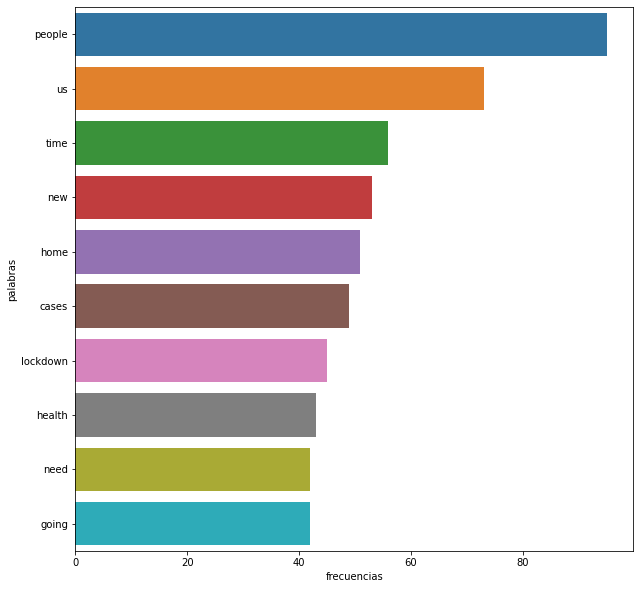

In [ ]:
random.seed(5678) #la semilla está fijada en el sample
lista=texto_limpio_sw.unique().tolist()
lista3 = lista[:] 
random.shuffle(lista3)
hasta_mil=lista3[:1000]
numero_palabras_mil=[len(sentence.split()) for sentence in hasta_mil]
lista_palabras_mil=[palabra for linea in hasta_mil for palabra in linea.split()]    
contador_mil_comunes=Counter(lista_palabras_mil).most_common(10)
contador_mil_comunes_df = pd.DataFrame(contador_mil_comunes)
contador_mil_comunes_df.columns = ['palabras', 'frecuencias']

palabras_mil = set()
for tweet in hasta_mil:
  palabras_mil.update(tweet)
total_mil = len(palabras_mil)
print("El numero total de palabras distintas es:",total_mil)
    
print("Cantidad de total de palabras:", sum(numero_palabras_mil))

fig, ax = pyplot.subplots(figsize = (10, 10))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=contador_mil_comunes_df)


En esta muestra la cantidad total de palabras es de 14672, mientras que la cantidad de palabras únicas es 249.


De estos tweets, se puede observar que las 10 palabras más repetidas son 'people', 'us', 'time', 'new', 'home', 'cases', 'lockdown', 'health', 'need', 'going'. Se puede notar que existen muchas palabras repetidas iguales en el estudio de 100 tweets y en el estudio de 1000 tweets. Esto demuestra la importancia e influencia que ha tenido la pandemia y las medidas adoptadas en los países de habla inglesa, ya que se podría deducir que el enfoque principal de los tweets es el mismo, hay una transversalidad en el dataset.


3) Siguiendo con la exploración y para empezar a entender el contenido del texto, se obtuvo un listado con las 25 palabras más frecuentemente usadas por los twiteros. Este ejercicio nos permite visualizar las temáticas más recurrentes que motivan a la gente a escribir y publicar un tweet. Además se realiza una figura descriptiva para analizar la información de manera visual.

**Gráfico 1: Frecuencia de palabras más usadas**

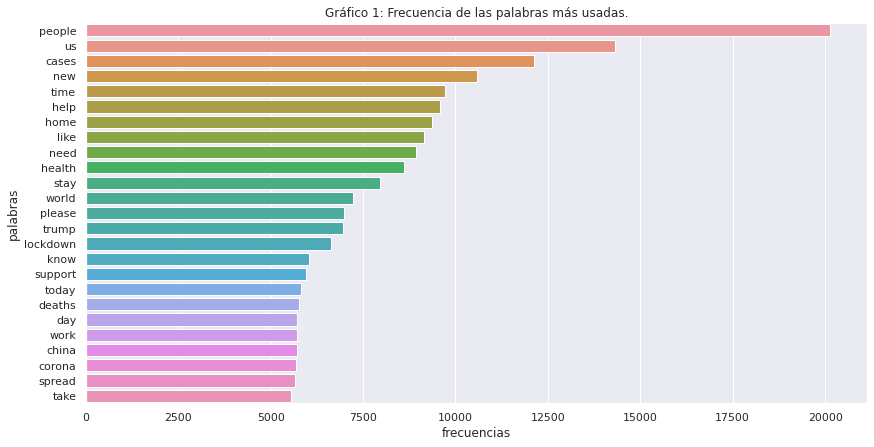

In [ ]:
#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in texto_limpio_sw for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 25 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df.columns = ['palabras', 'frecuencias']
fig, ax = pyplot.subplots(figsize = (14,7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico 1: Frecuencia de las palabras más usadas.")
pyplot.savefig('wordcount_bar.png')

(-0.5, 1919.5, 1079.5, -0.5)

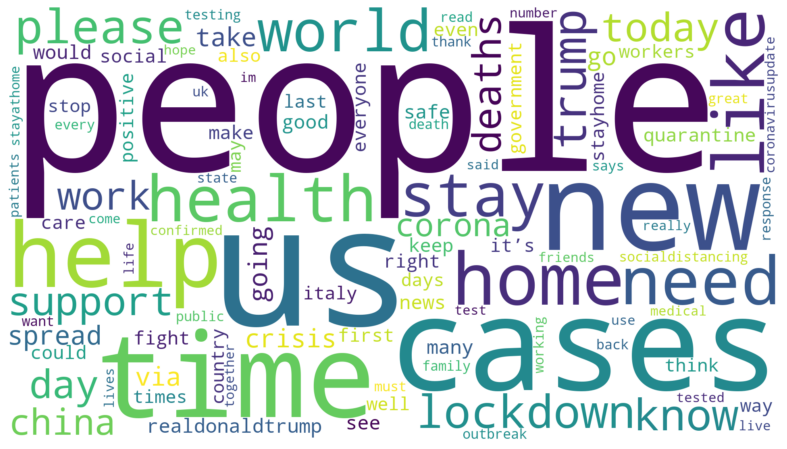

In [ ]:
#Figura descriptiva con las palabras más comunes de los tweets.
lista_palabras=[palabra for linea in texto_limpio_sw for palabra in linea.split()]  #Se agregan todas las palabras a una lista para poder graficarlas
#lista_palabras[:6]
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common()    #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df.columns = ['palabras', 'frecuencias']
freq_dict = {}
word_freq = counts_df.values
for i in range(word_freq.shape[0]):
    freq_dict[word_freq[i, 0]] = word_freq[i, 1]
wordc = WordCloud(width=1920,
                  height=1080,
                  background_color="white",
                  max_words=100,
                  random_state = 97).generate_from_frequencies(freq_dict)
pyplot.figure(figsize=(15,8))
pyplot.imshow(wordc, interpolation='bilinear')
pyplot.axis("off")



De inmediato se puede notar que la palabra más usada es “people” lo cual puede atribuirse a la alta cantidad de twiteros que buscan informar día a día sobre la cantidad de personas confirmadas de COVID-19 en sus países, o que simplemente buscan referirse a ese dato. Lo cual también se puede notar con los conceptos que vienen a continuación de "people", estos son: "cases", "new", "us" y "help".

Por otro lado, el gráfico denota que una segunda temática dominante es el manejo gubernamental de la crisis y las medidas tomadas al respecto, esta conclusión se basa en la presencia de palabras tales cómo: "trump", "help", "support" y "please".

Las palabras encontradas tienen concordancia con la crisis mundial que se está viviendo, y en base a ellas podemos concluir que los temas más preocupantes para la población se pueden agrupar en dos: La forma en la que se vive el distanciamiento social, y las medidas tomadas por los gobiernos para combatir el avance del virus.

4) Por otra parte, para tener una primera aproximación espacial sobre la distribución de los tweets en el globo, se realizan gráficos sobre las ciudades y países con mayor cantidad de tweets.

**Gráfico 2: Ciudades con mayor cantidad de tweets**



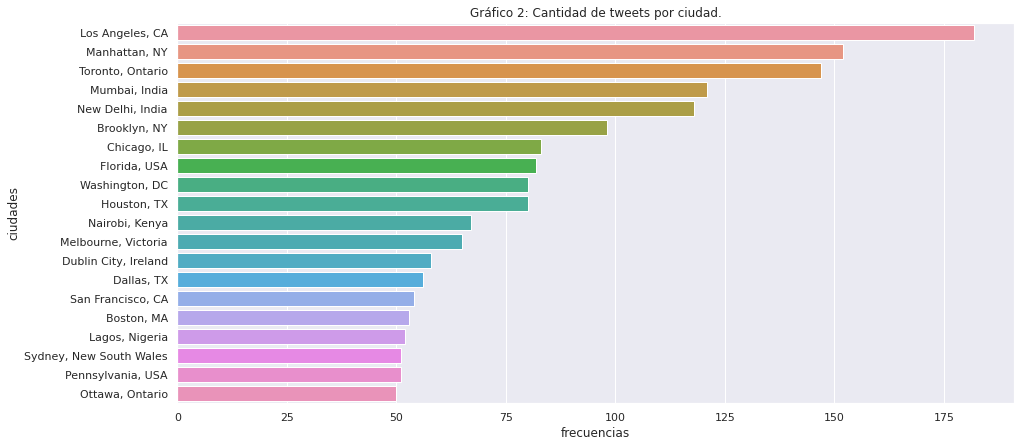

In [ ]:
ciudades=df['place_full_name']
ciudades=pd.DataFrame(ciudades)
ciudades=ciudades.dropna()
ciudades_count = ciudades.groupby(['place_full_name']).size().reset_index(name='count')
ciudades_count=ciudades_count.sort_values('count', ascending=False, inplace=False).head(20)
ciudades_count.columns = ['ciudades', 'frecuencias']
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15, 7))
pyplot.title("Gráfico 2: Cantidad de tweets por ciudad.")
ax = sns.barplot(y="ciudades", x='frecuencias', ax = ax, data=ciudades_count)
pyplot.savefig('wordcount_bar.png')

**Gráfico 3: Países con mayor cantidad de tweets**

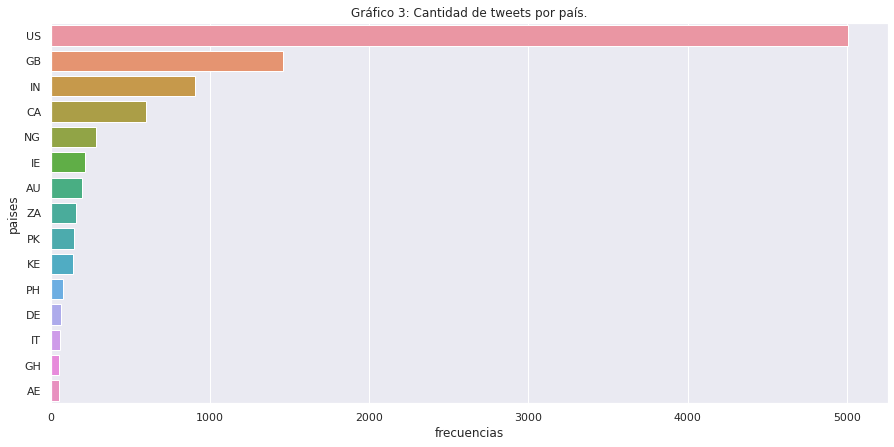

In [ ]:
paises=df['country_code']
paises=pd.DataFrame(paises)
paises=paises.dropna()
paises_count = paises.groupby(['country_code']).size().reset_index(name='count')
paises_count=paises_count.sort_values('count', ascending=False, inplace=False).head(15)
paises_count.columns = ['paises', 'frecuencias']
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15,7))
pyplot.title("Gráfico 3: Cantidad de tweets por país.")
ax = sns.barplot(y="paises", x='frecuencias', ax = ax, data=paises_count)
pyplot.savefig('wordcount_bar.png')


Al analizar la cantidad de tweets con los que cada ciudad de habla inglesa aporta a este listado, inicialmente se puede ver que las ciudades Estado Unidenses concentran la mayor cantidad de publicaciones. Esto se puede deber a que a nivel mundial es uno de los países más afectados por ésta pandemia, no sólo en cifras de contagios sino que también en fallecidos considerando su población total, de hecho, es interesante notar que California y New York es una de las la ciudades más afectada por el virus y lidera el ranking, por lo que se puede estimar un muy alto número de tweets per cápita en dicha ciudad.


En relación a los datos basados en geolocalización es importante mencionar que los usuarios no siempre incuyen la ubicación al postear por lo que una cantidad no menor de filas en nuestro dataset tienen valor nulo en este atributo, adicionalmente, el nivel de precisión de la localidad puede variar. Por ejemplo, Irlanda, Gales, Escocia es considerado dentro del país GB, lo cual se podría mejorar si cada locación se considerara como una sola y no todas como un mismo país. En resumen, al trabajar con datos geolocalizados es importante considerar estos factores ya que hacen que el análisis quede sujeto a errores.

El tercer gráfico ordena a los diferentes paises según número de tweets y en él se observa que, en concordancía con el gráfico anterior, Estados Unidos es por lejos el país con mayor número de tweets, seguido de Gran Bretaña e India.

Este ranking, exceptuando el hecho de que Estados Unidos ocupa el primer puesto, se ajusta más al número de habitantes por país que el gráfico estudiado anteriormente, por lo que se puede analizar la homogeneidad de tweets a lo largo del territorio de cada pais, es decir, podemos encontrar paises en los que la cantidad de tweets generados en un par de grandes metrópolis aportan con la gran mayoría del total del país, mientras que por otro lado, hay países en los que una gran cantidad de localidades más pequeñas, en su suma, contribuyen de forma importante al total de tweets del país. 



5) Se realiza también un análisis general de cantidad de tweets por día y hora del presente dataset, de manera de tener una primera aproximación temporal sobre los datos.

**Gráfico 4: Cantidad de tweets por día** 



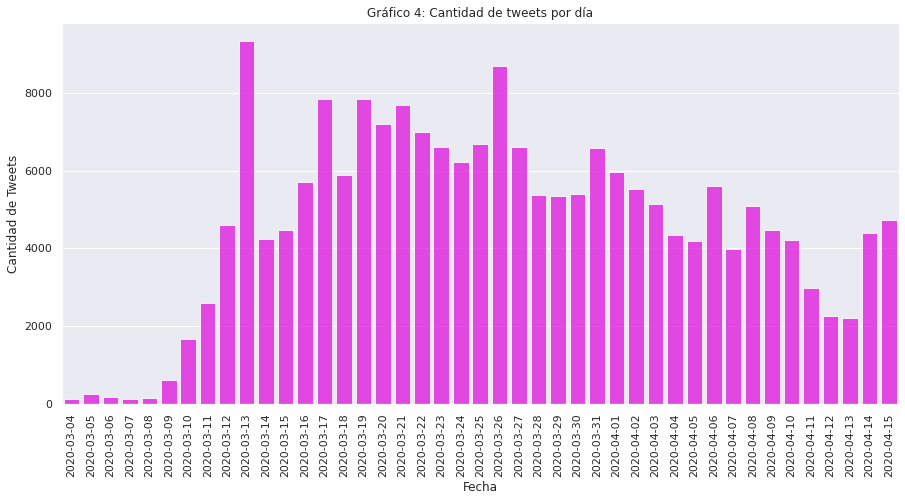

In [ ]:
#Cantidad de tweets diarios

df['created_at'] =  pd.to_datetime(df['created_at'])
cnt_srs = df['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
pyplot.figure(figsize=(15,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='magenta')
pyplot.xticks(rotation='vertical')
sns.set(style="darkgrid")
pyplot.xlabel('Fecha', fontsize=12)
pyplot.ylabel('Cantidad de Tweets', fontsize=12)
pyplot.title("Gráfico 4: Cantidad de tweets por día")
pyplot.show()

Analizando las fechas de los tweets, se observa que la segunda semana de marzo ve un aumento en la cantidad de tweets de la mencionada naturaleza en comparación a la semana anterior, de hecho, el día viernes 13 de marzo fue el día con mayor cantidad de tweets relacionados al virus registrados (más de % sólo en inglés); este aumento coincide con la fecha en que se suspendieron vuelos en Europa, por otro lado el día 26 de Marzo (segundo día con más tweets respecto al tema) coincide con el día en que el mundo alcanzó los 500.000 contagios, en general fue durante este período que se empezaron a implementar medidas sanitarias y de aislamiento más drásticas a lo largo del continente de Europa y Estados Unidos y también del mundo, a la par que el número de contagios aumentaba. En base a ello, se puede establecer a priori una correlación entre actividad en Twitter y algunos momentos clave en el desarrollo de la enfermedad en el mundo.

Es interesante también el hecho de que a medida que la población se va acostumbrando a las medidas tomadas, el número de tweets diarios disminuye sostenidamente, quedando en evidencia una de las caracteristicas más distintivas de las redes sociales y de la información que en estas se maneja día a día, y es el hecho de que toda tendencia en ellas resulta ser efímera, en general el interés de los usuarios, que tienen fácil acceso a una cantidad inimaginable de nueva información, disminuye con el paso de tiempo y se va desviando hacia otros temas. 

Dado que cada fecha entre el 12 de marzo y 15 de abril tiene una cantidad importante de tweets, será posible analizar la predominancia de sentimientos por fecha, a modo de descubrir si existió algún cambio en relación a las emociones generales de los usuarios que se referian a la pandemia a través de su cuenta de twitter.


**Gráfico 5: Cantidad de tweets por hora**




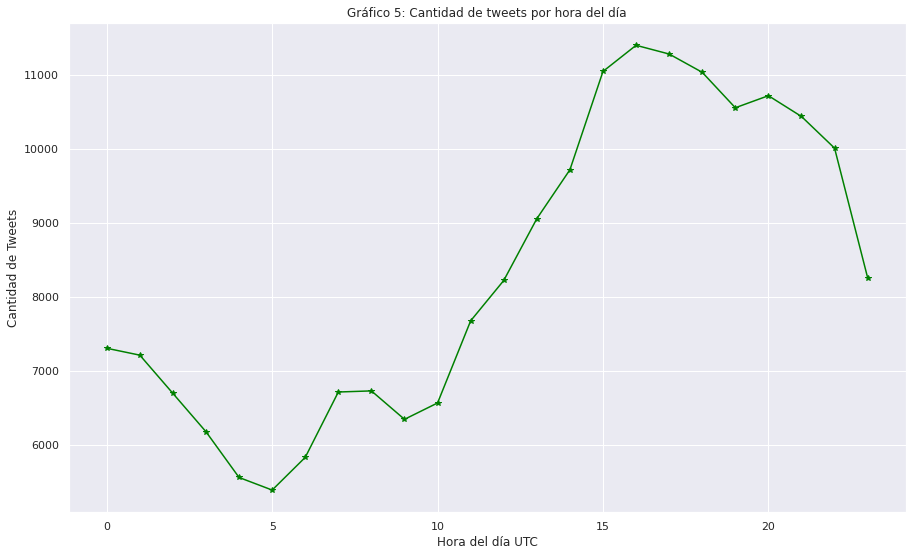

In [ ]:
#Cantidad de tweets por cada hora 
df['created_at'] =  pd.to_datetime(df['created_at'])
hora_tweet= df['created_at'].dt.hour
cnt_ = hora_tweet.value_counts()
cnt_ = cnt_.sort_index() 
sns.set(style="darkgrid")
fig, ax = pyplot.subplots(figsize = (15, 9))
pyplot.plot(cnt_.index,cnt_.values,'*-',color="GREEN")
pyplot.xlabel('Hora del día UTC', fontsize=12)
pyplot.ylabel('Cantidad de Tweets', fontsize=12)
pyplot.title("Gráfico 5: Cantidad de tweets por hora del día")
pyplot.show()


El Gráfico 5 permite observar una clara tendencia a que la gente de habla inglesa twittea en mayor cantidad desde las 16:00 UTC (12:00 am Hora Chilena, 09:00 am New York y 17:00 hras Londres). Como es de esperar el número de tweets decae en horarios nocturnos y durante las mañanas. 

Además, resulta interesante notar que la cantidad de tweets a las 3 de la mañana hora chilena es igual o hasta superior que la cantidad de tweets a las 10 de la mañana hora chilena, lo cual se puede deber por la diferencia horaria existente con los países de habla ingles, sin embargo, sería interesante comparar este gráfico con uno previo a la llegada del coronavirus y las cuarentenas para analizar cómo ha afectado el encierro a los horarios de sueño de la gente. 

6) Uno de los atributos del cual entrega información el dataset es el tipo de cuenta del usuario que emite el tweet. Las clasifica entre verificadas y no verificadas. Las cuentas verificadas corresponden a usuarios más influyentes en la red, por lo que vale la pena tenerlas presentes y saber su magnitud en el dataset

**Gráfico 6: Cantidad de cuentas verificadas y no verificadas**




Text(0, 0.5, 'Cantidad de Cuentas')

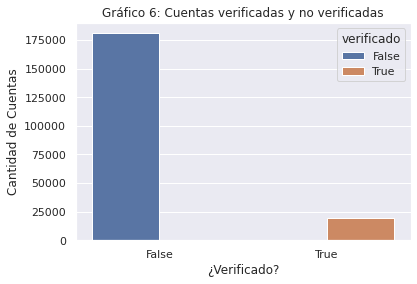

In [ ]:
#Cantidad de cuentas verificadas y cuentas comunes

verificado=df['verified']
verificado=pd.DataFrame(verificado)
verificado=verificado.dropna()
verificado_count = verificado.groupby(['verified']).size().reset_index(name='count')
verificado_count.columns = ['verificado', 'frecuencia']
sns.barplot(x='verificado', y='frecuencia', hue='verificado', data=verificado_count)
pyplot.title("Gráfico 6: Cuentas verificadas y no verificadas")
pyplot.xlabel('¿Verificado?', fontsize=12)
pyplot.ylabel('Cantidad de Cuentas', fontsize=12)


Comparando la cantidad de cuentas que twittean estando o no estando verificadas,en el Gráfico 6 se puede observar que existe un cantidad significativamente mayor de personas no verificadas en la red social compartiendo sus pensamientos.

Esta relación es esperable, debido a que no es fácil tener una cuenta verificada, ya que twitter solo entrega la verificación a cuentas oficiales de personalidades públicas y organizaciones, por lo que hay muchas menos dentro del universo total de cuentas que participan en la red social.

Se  puede continuar analizando el dataset de acuerdo a sus características, por ejemplo, se puede chequear los valores nulos del dataset, de donde se obtiene que la mayoría de las columnas del dataset, esto es, los atributos del dataset, tienen cero valores nulo en promedio. Sin embargo es importante notar, que los atributos "country_code", "place_full_name" y "place_type" tienen un alto porcentaje de valores en sus columnas, lo que se puede deber a que muchas personas que han tweeteado durante el periodo de estudio no indican su ubicación o su cuenta no está asociada a una locación.

In [ ]:
#chequeando valores nulos dentro del df
df.isnull().mean()*100

Unnamed: 0.1              0.0000
status_id                 0.0000
user_id                   0.0000
created_at                0.0000
screen_name               0.0000
text                      0.0000
source                    0.0005
reply_to_status_id       86.9795
reply_to_user_id         83.6695
reply_to_screen_name     83.6695
is_quote                  0.0000
is_retweet                0.0000
favourites_count          0.0000
retweet_count             0.0000
country_code             94.7510
place_full_name          94.7205
place_type               94.7205
followers_count           0.0000
friends_count             0.0000
account_lang            100.0000
account_created_at        0.0000
verified                  0.0000
lang                      0.0000
dtype: float64

Por otro lado, se puede analizar la fecha de los datos recolectados, considerando que del dataset se eligió una muestra de % datos. Se puede observar que los datos recolectados van desde el día % al %.

In [ ]:
df['created_at'] =  pd.to_datetime(df['created_at'])
#tomando la fecha minima y la fecha maxima de los datos en el dataframe
print(f"Data desde la fecha {df.created_at.min()}")
print(f"Data hasta la fecha {df.created_at.max()}")

Data desde la fecha 2020-03-04 12:07:01+00:00
Data hasta la fecha 2020-04-15 23:59:21+00:00


También se puede analizar la antiguedad de los usuarios que han tweeteado en el periodo de tiempo mencionado anteriormente. 

In [ ]:
df['account_created_at']= pd.to_datetime(df['account_created_at'])
#analizando los usuarios, desde el más antiguo al más nuevo
print(f"Usuario más antiguo creado desde {df.account_created_at.min()}")
print(f"Usuario más nuevo creado desde {df.account_created_at.max()}")

Usuario más antiguo creado desde 1970-01-01 00:00:00+00:00
Usuario más nuevo creado desde 2020-04-15 20:36:25+00:00


Se estudió también el máximo número de retweets y el número de tweets favoritos.

In [ ]:
#mas favorito and tweet retweet
print(f" Maximo número de retweets {df.retweet_count.max()}")
print(f" Maximo número de favoritos {df.favourites_count.max()}")

 Maximo número de retweets 26033
 Maximo número de favoritos 1534570


Se estudió la fecha de creación de las cuentas que tweetearon durante el periodo de estudio en relación con el covid19.

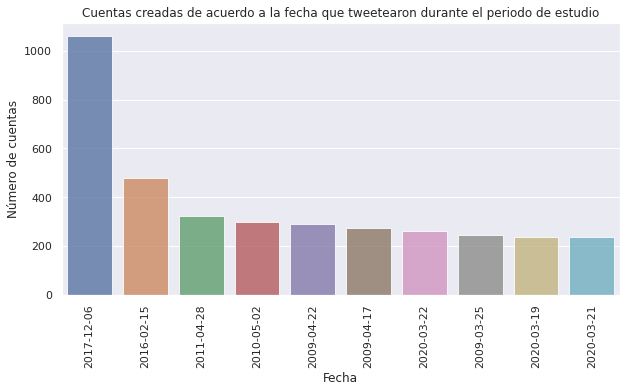

In [ ]:
count_  = df['account_created_at'].dt.date.value_counts()
count_ = count_[:10,]
plt.figure(figsize=(10,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Cuentas creadas de acuerdo a la fecha que tweetearon durante el periodo de estudio')
plt.xticks(rotation='vertical')
plt.ylabel('Número de cuentas', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.show()

Se puede observar que existe una fecha muy marcada en donde hubo mayor creación de cuentas, esto se puede deber a que en éste periodo se masificó la plataforma de tweeter.

Se analizó la cantidad de tweets por día de la semana y de ello se obtuvo el porcentaje correspondiente para cada día, esto para descartar que los tweets fueran de un sólo día y de ello se pudiese obtener un sesgo.

Es importante destacar que pese a que todos los días de la semana hubo tweets, la data igual presenta un sesgo dada por la fecha, es decir en los meses de Marzo-Abril, puesto que probablemente fueron los meses más acontecidos en cuanto al COVID-19 ya que precisamente en éstos meses se impusieron medidas de confinamiento estrictas en todo mundo, hubo un alto número de contagios alrederos del planeta, y los gobiernos de cada país tuvo que tomar medidas para controlar al virus.

In [ ]:
import plotly.graph_objs as go
df['created_at'] =  pd.to_datetime(df['created_at'])
df['account_created_at']= pd.to_datetime(df['account_created_at'])
df['tweeted_day_of_week'] = df['created_at'].dt.day_name()
cnt_ = df['tweeted_day_of_week'].value_counts()
cnt_ = cnt_.sort_index()
df['created_day_of_week'] = df['account_created_at'].dt.weekday
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Porcentaje de Tweets de acuerdo a los días de la semana",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de Tweets de acuerdo a los días de la semana",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)

Friday       32624
Monday       26146
Saturday     24717
Sunday       23399
Thursday     31367
Tuesday      30712
Wednesday    31035
Name: tweeted_day_of_week, dtype: int64


Se puede visualizar que todos los días de la semana hubo tweets, pero es importante notar también que hay días que de por sí son más acontecidos en tweeter.

Continuando, se extrajo atributos de los tweets, esto se realizó utilizando la función apply a la columna texto del data frame original. 

Los atributos extraídos son: 
* contador de oraciones
* contador de palabras 
* contador de palabras únicas 
* contador de letras
* contador de puntuaciones
* contador de mayúsculas en palabras y letras
* contador de palabras en título
* contador de stopwords
* promedio del largo de palabras

In [ ]:
#EXTRACCION CARACTERÍSTICAS DE LOS TWEETS
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["text"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in sw]))
#Average length of the words
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [ ]:
df.describe().T

count          mean  ...           75%           max
status_id            200000.0  1.243408e+18  ...  1.246138e+18  1.250575e+18
user_id              200000.0  3.150514e+17  ...  8.322009e+17  1.250569e+18
reply_to_status_id    26025.0  1.242660e+18  ...  1.246077e+18  1.250567e+18
reply_to_user_id      32594.0  1.931369e+17  ...  2.875980e+09  1.250455e+18
favourites_count     200000.0  1.362273e+04  ...  9.859000e+03  1.539199e+06
retweet_count        200000.0  3.741735e+00  ...  1.000000e+00  2.319700e+04
followers_count      200000.0  5.272991e+04  ...  3.432250e+03  4.638474e+07
friends_count        200000.0  2.174631e+03  ...  1.641000e+03  1.181437e+06
account_lang              0.0           NaN  ...           NaN           NaN
created_day_of_week  200000.0  2.787785e+00  ...  4.000000e+00  6.000000e+00
count_sent           200000.0  2.371890e+00  ...  3.000000e+00  3.900000e+01
count_word           200000.0  2.671384e+01  ...  3.700000e+01  1.040000e+02
count_unique_word    200000.0  2.481208e+01  ...  3.400000e+01  9.600000e+01
count_letters        200000.0  1.926564e+02  ...  2.620000e+02  9.870000e+02
count_punctuations   200000.0  1.178945e+01  ...  1.500000e+01  1.090000e+02
count_words_upper    200000.0  1.393420e+00  ...  2.000000e+00  5.400000e+01
count_words_title    200000.0  3.795035e+00  ...  5.000000e+00  5.000000e+01
count_stopwords      200000.0  9.330610e+00  ...  1.400000e+01  4.500000e+01
mean_word_len        200000.0  6.650299e+00  ...  7.450000e+00  6.400000e+01

[19 rows x 8 columns]

De los nuevos y antiguos atributos se obtuvo una nueva tabla de descripción, donde se obtiene el contador, el promedio, la desviación estándar, el mínimo, el máximo y los cuartiles asociados.


Se puede visualizar también que para el atributo "count_lang" su columna completa tiene asociado el valor Nan, por lo que no nos brinda ningún conocimiento, esto también se pudo ver en el chequeo de valores Nan que se realizó antes.

Finalmente, de los nuevos atributos se hizo un gráfico pairplot donde se puede ver la relación que tiene con sí mismo y también con los demás atributos, de aquí se puede ver si su relación es lineal o si en realidad no existe mucha relación.

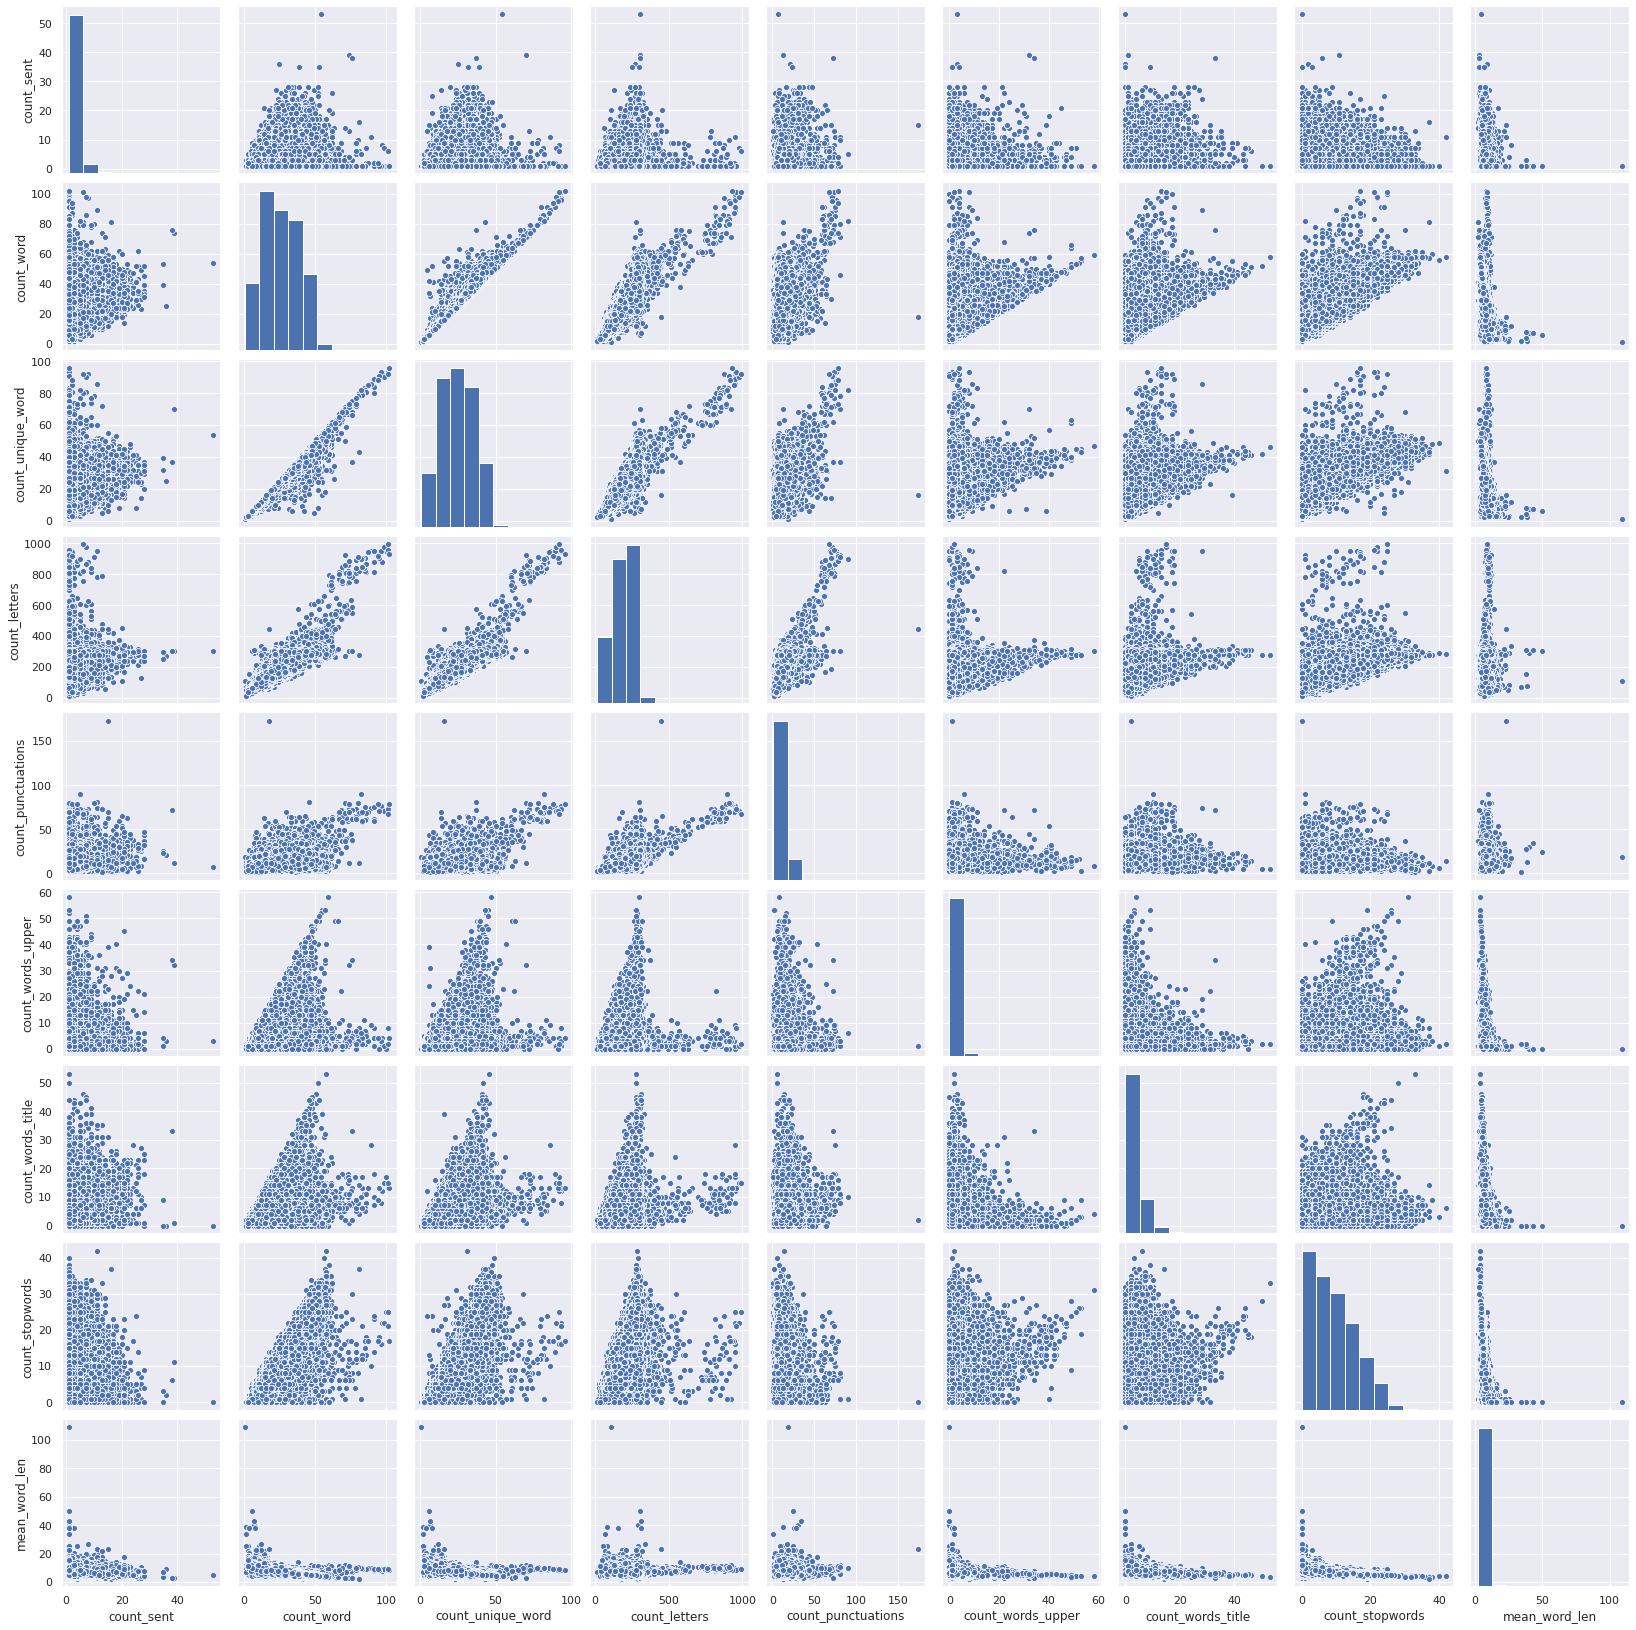

In [ ]:
#PAIRPLOT DEL TEXTO BASADO EN CARACTERÍSTICAS

#CORRELACIÓN DE CADA OTRO ATRIBUTO
sample_df = df[['count_sent','count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
del sample_df

Del gráfico se puede observar que para ciertos atributos existe relación directa, mientras que para distintos atributos no se puede apreciar una relación explícita.

Por ejemplo, para el atributo contador de palabras únicas y contador de palabras la relación es lineal (se puede apreciar una recta de pendiente perfecta), mientras que para los atributos contador de palabras en el título y contador de stopwords no existe una relación clara. 

También se puede observar que por ejemplo, el atributo de promedio de largo de las palabras tiene una relacion exponencial negativa con el atributo de contador de stopwords, así como también con el contador de puntuaciones, con el contador de palabras en mayúsculas, y con el contador de palabras.

Finalmente se puede visualizar que para los atributos contador de oraciones y contador se palabras se forma una gaussiana que los relaciona.



## **Experimentos y resultados**

En esta sección se explicarán los experimentos realizados y los resultados obtenidos. 

Es importante recalcar que los experimentos están orientado a responder las preguntas de investigación e hipótesis ya descritas, las cuales a modo de resumen son las siguientes:

- ¿Cómo se vincula la esfera emocional de los ciudadanos con el contexto actual de pandemia? Se intuye que la preocupación y los sentimientos negativos sobretodo predominarán en lo que respecta al virus.

- ¿Cuáles son las distintas temáticas en que se clasifican los tweets analizados y qué sentimientos se asocian a cada temática? Se cree que algunas de las temáticas posibles de identificar son temas relacionados con política, salud, cosas relativas al hogar, entre otras. 

- ¿Cómo se replica este análisis a nivel de países? Se esperan encontrar diversos resultados dependiendo del país en que se emitan los comentarios.



Para esto, se dividirá el análisis en dos partes principales. La primera dice relación con el análisis de sentimientos y temáticas del dataset original, mientras que la segunda presenta un análisis por países.






 




### Análisis General

#### Análisis de sentimientos



Lo primero que se realizó fue un análisis de sentimientos en el dataset completo. Así, se puede observar de manera general el comportamiento de los datos obtenidos. 

De acuerdo a los tweets, se analizó los sentimientos de cada uno, para ello se utilizó la función map sobre el texto de cada tweeter y se creó una columna con los números en el rango [-1,1], donde el número -1 indica sentimiento muy negativo, el número 0 indica sentimiento neutral y el número 1 indica sentimiento muy positivo, de ello se graficó un histograma para visualizar el comportamiento.

In [ ]:
#Clasificar cada tweet con alguna polaridad
df['sentiment'] = df['text'].map(lambda texto: TextBlob(texto).sentiment.polarity)
trace1 = go.Histogram(
    x = df['sentiment'],
    opacity=0.75,
    name = "Sentiment",
    marker=dict(color='rgba(122, 75, 196, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Histograma de Sentimientos',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict( title='Count'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como en el caso anterior los valores de sentimiento se encuentran muy disgregados, se greafica nuevamente para una mejor visualización.

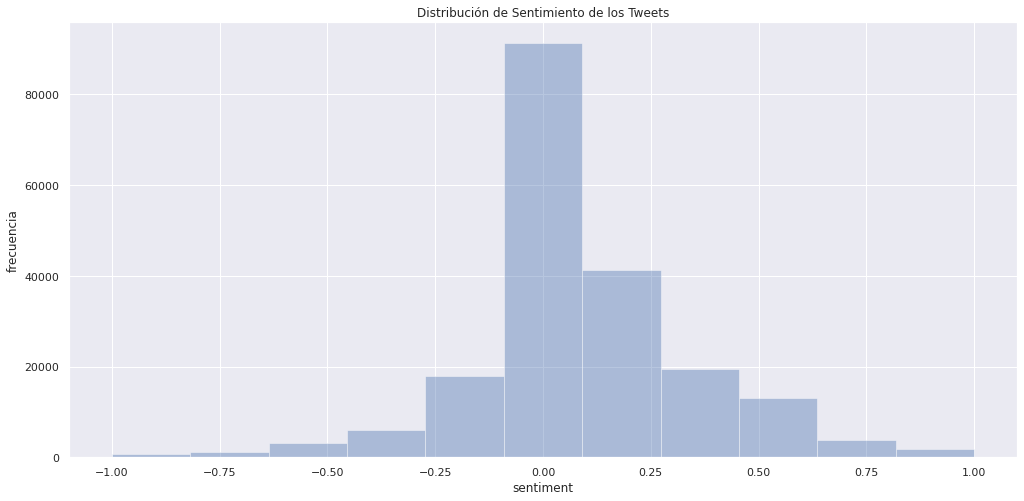

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df['sentiment'],kde=False,norm_hist=False,bins=11, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

De los histogramas, se puede observar que la mayoría de sentimientos fluctúan entorno al cero, lo cuál se puede deber a la gran cantidad de tweets informativos en relación al COVID-19 que rondan por las redes sociales.

Por otro lado se puede ver también que la mayoría de los sentimientos se asocian más bien a sentimientos positivos (>0), se puede deber a un sentimiento de optimismo en cuanto a la crisis que se está viviendo.

Se creó una tabla de tal forma de ver la polaridad de los sentimientos, esto es, si en la columna sentimiento del dataframe había un número menor que 0, entonces el sentimiento asociado debiese ser negativo, si el número era mayor que cero, entonces el sentimiento asociado debiese ser positivo, y por último, si el número era cero, entonces el sentimiento era neutral.

Se puede ver que la tabla clasifica de forma correcta.

In [ ]:
#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']].head()

polarity  sentiment
5748998    neutral   0.000000
2599055    neutral   0.000000
11362402   neutral   0.000000
6480105    neutral   0.000000
2655105   positive   0.041667

Se realizó un gráfico de barras que sintetiza la polaridad de los sentimientos asociados a los tweets durante el tiempo estudiado.

Se puede observar que en forma mayoritaria existen tweets asociados a un sentimiento positivo, lo cual se puede ver como tweets optimista en relación a la crisis que se está viviendo a nivel mundial, en segundo lugar los tweets tienen relacionado un sentimiento neutral que se pueden asociar a los tweets informativos en la plataforma y finalmente, los tweets negativos son los que tienen menos cantidad en la red social.

Text(0, 0.5, 'Frecuencia del sentimiento')

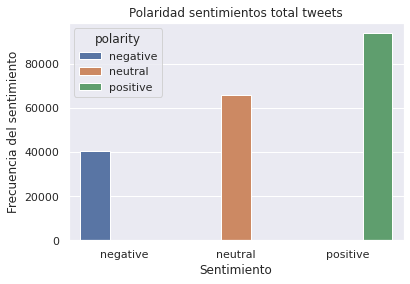

In [ ]:
sent=df['polarity']
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Polaridad sentimientos total tweets')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)

Se contabilizó cuantos tweets eran positivos, cuantos negativos y cuantos neutros.





In [ ]:
df['polarity'].value_counts()

positive    93941
neutral     65705
negative    40354
Name: polarity, dtype: int64

Otra forma de visualizar lo obtenido es mediante un gráfico de radar, de acuerdo a las polaridades (positivo, negativo, neutro) obtenidas del dataser original. Se puede visualizar que la mayoría de los tweets son positivos.

In [ ]:
data = [go.Scatterpolar(
  r = [df['polarity'].value_counts()[2],df['polarity'].value_counts()[1],df['polarity'].value_counts()[0]],
  theta = list(df['polarity'].unique()),
  fill = 'toself'
)]
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 120000]
    )
  ),
  showlegend = False,
  title ='Radar de polaridades'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

Una última forma de visualizar la polaridad de los tweets, es mediante porcentajes, como se muestra en la siguiente figura. Esta será una buena forma de visualizarlos pues permite la comparación.

In [ ]:
cnt_ = df['polarity'].value_counts()
cnt_ = cnt_.sort_index()
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)

negative    40354
neutral     65705
positive    93941
Name: polarity, dtype: int64


A continuación, se muestra un análisis de frecuencia de las palabras más utilizadas en cada uno de los sentimientos.

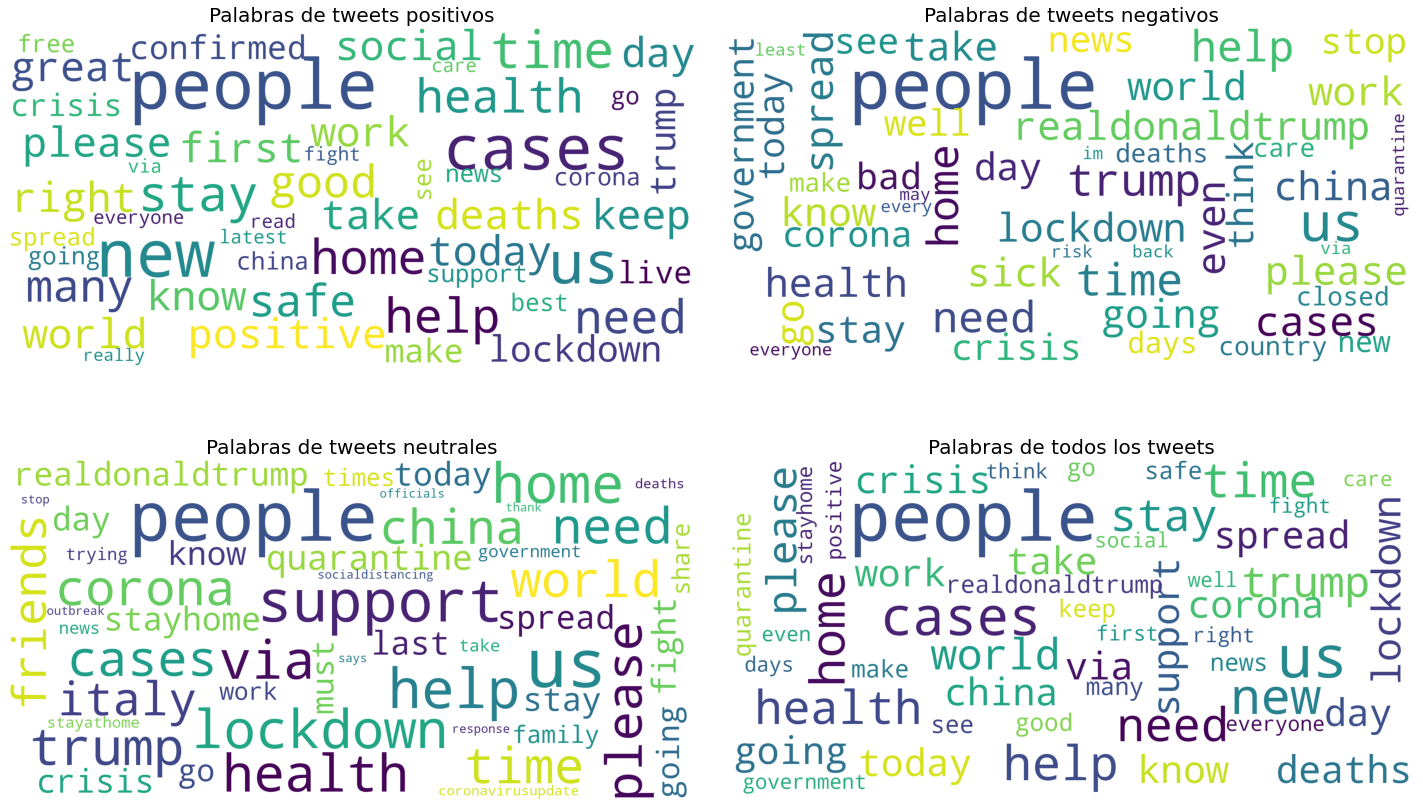

In [ ]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = texto_limpio_sw
polar_tweets_df['polarity'] = df['polarity']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']
complete = polar_tweets_df['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]
complete_list = [word for line in complete for word in line.split()]


positive_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False).generate(' '.join(neutral_list))

complete_cloud = WordCloud(
    background_color='white',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False).generate(' '.join(complete_list))

fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Palabras de tweets positivos', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Palabras de tweets negativos', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Palabras de tweets neutrales', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(complete_cloud)
axs[1, 1].set_title('Palabras de todos los tweets', fontsize = 20)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')

Extrayendo las palabrás más utilizadas en los tweets de acuerdo a su polaridad, esto es palabras que más se repiten en tweets positivos, palabras que más se repiten en tweets negativos y palabras que más se repiten en tweets neutros, se puede ver que destacan:

* Tweets positivos: "people", "cases", "new", "stay", "good", "home".
* Tweets negativos: "trump", "people", "china", "realdonaldtrump", "sick".
* Tweets neutros: "people", "support", "italy", "help", "cases", "lockdown".

Entre las palabras más frecuentes de los tweets clasificados como negativos saltan a la vista "trump",  "realdonaldtrump",  "government". Esto habla de una aparente disconformidad con las políticas impartidas en Estados Unidos (país con mayor cantidad de tweets). En los tweets con sentimientos positivos destacan palabras relacionadas con el cuidado para prevenir el contagio, como "home", "safe", "stay", además de palabras que indican un componente colectivo de la temática de los tweets, como "social", "people". Las palabras más frecuentes de los tweets clasificados como neutros son bastante variadas y da la impresión que se relacionan con la comunicación de información. Aparecen varias palabras ya clasificadas dentro de los tweets negativos y positivos además.  


Finalmente, se agrega la variable temporal, para un mejor entendimiento del comportamiento de los usuarios de la aplicación en términos de los sentimientos expresados por medio de ella.





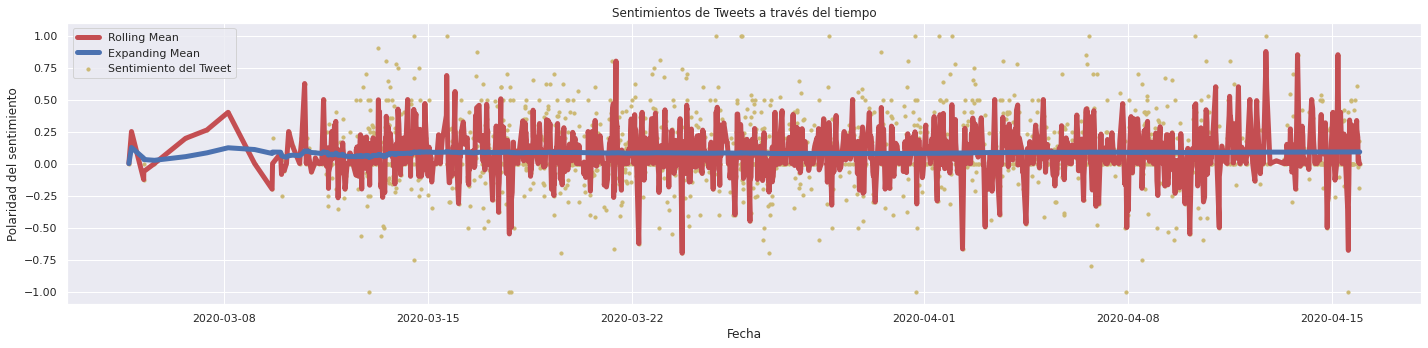

In [ ]:
sentiments_time_df = pd.DataFrame()
sentiments_time_df['time'] = df['created_at']
sentiments_time_df['polarity'] = df['sentiment']
sentiments_time_df.index = pd.to_datetime(sentiments_time_df['time'])

ot = sentiments_time_df.sample(frac=.01)
ot['time'] = pd.to_datetime(ot['time'])
ot.index = pd.to_datetime(ot['time'])
ot.sort_index(inplace=True)
ot['expanding'] = ot['polarity'].expanding().mean()
ot['rolling'] = ot['polarity'].rolling('1h').mean()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(ot['time'],ot['polarity'], label='Sentimiento del Tweet', s = 10, color = 'y')
ax.plot(ot['time'],ot['rolling'], color ='r', label='Rolling Mean', linewidth = 5)
ax.plot(ot['time'],ot['expanding'], color='b', label='Expanding Mean', linewidth = 5)
ax.set(title='Sentimientos de Tweets a través del tiempo', xlabel='Fecha', ylabel='Polaridad del sentimiento')
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('temporal_sentiments.png')

La línea roja corresponde a la polaridad de los tweets por día instantáneamente, mientras que la línea azul muestra en promedio la distribución de los tweets de donde se puede ver que en general ronda en torno a cero o un poco más de cero, esto es, en general los sentimientos son neutros o ligeramente positivos.

Al observar el análisis de sentimientos en el tiempo, se puede visualizar que hay días de excepción donde existen peaks de sentimientos negativos, y también existen peaks de sentimientos positivos.

Por ejemplo, el dia 14 de Marzo existe un gran peak de sentimiento negativo, lo cual se puede deber a la fecha en que se inció la cuarentena obligatoria en España, además de que Italia registra su día con mayor contagios hasta la fecha. El segundo peak negativo, se alcanza entre los días 24 de Marzo y 27 de Marzo, días muy acontecidos ya que se cancelaron los Juegos Olímpicos en Japón para el año 2020, se declara que el primer ministro de Reino Unido está contagiado con COVID-19 y el número de contagios a nivel mundial alcanza el medio millón de personas. 

#### Clustering

Adicionalmente, se desea observar si hay alguna estructura presente en los datos, que permita dilucidar de alguna manera las temáticas a las que se refieren los usuarios en sus tweets.
Para esto se realizaron dos algoritmos de clustering: LDA y k.means.

A continuación, se tienen las funciones implementadas para tokenizar y realizar steming sobre el texto de los tweets, proceso que elimina los prefijos/sufijos de las palabras para quedarnos sólo con el significado básico de las palabras, su 'tallo'

In [ ]:
#Funciones para tokenizar, limpiar y procesar el texto de cada tweet.
#TOKENIZE WORDS
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

#GET LEMMA 1: Significados, sinonimos y antonimos.
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
#GET LEMMA 2: Palabra raiz
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

#Preparar texto (aplicar las funciones anteriores)
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 2]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
lista_texto=texto_limpio_sw.to_numpy() #Texto de todos los tweets. texto_limpio_sw es el dataframe de tweets, el cual se pasa a lista.
lista_texto 

array(['even escape fucker lockdown tryna quarantine peace man',
       'scottmorrisonmp hey didn’t call week let’s see plays timeline',
       '🖋 support laurel signing “support usps” deliver copy officials 📨 last delivered johncornyn sentedcruz repmccaul tx10 txpolitics',
       ...,
       'megastar event needs pga approval could major snag bucs gobucs buccaneers tb12 pgatour coronavirususa covid19pandemic colts broncos',
       'covering outbreak mountain region madrid spain workers loading beams crane construction site yomequedoencasa quedateencasa photojournalism fotoperiodismo documentaryphotography',
       'adjusting online classes tamusoilcrop professor dr sakiko okumoto videos lab aggiesoilcrop students wewillgetthroughthis'],
      dtype=object)

In [ ]:
text_data=[] #Lista donde se guardan los tokens y stem de los textos.
for i in range(len(lista_texto)): #Se tokeniza cada tweet
  tokenized=prepare_text_for_lda(lista_texto[i])
  text_data.append(tokenized)
text_data[:3]

[(['even',
   'escape',
   'fucker',
   'lockdown',
   'tryna',
   'quarantine',
   'peace',
   'man'],
  ['even',
   'escape',
   'fucker',
   'lockdown',
   'tryna',
   'quarantine',
   'peace',
   'man']),
 (['scottmorrisonmp',
   'hey',
   'n’t',
   'call',
   'week',
   'let',
   'see',
   'play',
   'timeline'],
  ['scottmorrisonmp',
   'hey',
   'n’t',
   'call',
   'week',
   'let',
   'see',
   'plays',
   'timeline']),
 (['support',
   'laurel',
   'signing',
   'support',
   'usps',
   'deliver',
   'copy',
   'official',
   'last',
   'deliver',
   'johncornyn',
   'sentedcruz',
   'repmccaul',
   'tx10',
   'txpolitics'],
  ['support',
   'laurel',
   'signing',
   'support',
   'usps',
   'deliver',
   'copy',
   'officials',
   'last',
   'delivered',
   'johncornyn',
   'sentedcruz',
   'repmccaul',
   'tx10',
   'txpolitics'])]

Lo primero que se debe realizar estos algoritmos de clustering es definir el número de clusters. 

Para el caso de K-means se intentará encontrar un número óptimo mediante el método del codo, sin embargo, es importante notar que al vectorizar los tweets del dataframe, se obtendrán un gran número de columnas (palabras de los tweets), por lo que aparece el conocido problema de "maldición de dimensionalidad". Al haber un gran número de dimensiones (columnas), las métricas de distancia se vuelven poco decidoras y no se observará punto claro de inflexión al ir aumentado el número de clusters, como se mostrará más adeltante.

Por lo anteriormente comentado, se comenzará realizando el algoritmo de clustering LDA, diseñado específicamente para clustering de textos, que permite observar de manera rápida y expedita los resultados obtenidos del clustering y las palabras encontradas en cada uno de los clusters definidos. A partir de este algoritmo se decidirá un número de clusters que entregue resultados razonables según el criterio de los estudiantes. Posteriormente se realizará el algortimo de clustering k-means con el mismo número de clusters obtenido en LDA y se comentarán similitudes o diferencias.

##### Latent Dirichlet Allocation

Antes de comenzar se debe aclarar que esta sección del análisis se realizó con una muestra aleatoria de 200.000 tweets, ya que el número inicial de 1 millón de tweets hace que el procesamiento se torne demasiado lento.

Para verificar que los clusters obtenidos respondan efectivamente a una estructura interna de los datos y no sea productro de un ordenamiento aleatorio de los mismos, se corroborarán los resultados con otro algoritmo posteriormente.

LDA, o Asignación Latente de Dirichlet. Esta es una técnica de modelamiento estadístico que identifica tópicos abstractos tratados en el texto de algún documento. En este caso, se aplica LDA a todos los tweets de la muestra tomada del dataset. 

LDA trabaja en dos niveles, primero generando una cantidad definida de tópicos en el texto trabajado y además define las palabras que están mayormente asociadas a cada tópico.  

Con la aplicación de esta técnica se busca descubrir las temáticas más tratadas en twitter en las primeras semanas de la pandemia y tener un punto de comparación con los resultados de k-means. 




**Analisis LDA**

In [ ]:
#Fuente: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [ ]:
#OBTENER DIFERENTES TEMATICAS
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

NUM_TOPICS = 5 #Numero de tópicos a encontrar
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4) #Numero de palabras por tópico
for topic in topics:
    print(topic)

(0, '0.012*"help" + 0.010*"support" + 0.009*"health" + 0.009*"crisis"')
(1, '0.017*"people" + 0.011*"like" + 0.009*"know" + 0.008*"say"')
(2, '0.022*"home" + 0.021*"stay" + 0.011*"safe" + 0.010*"stayhome"')
(3, '0.016*"trump" + 0.012*"china" + 0.009*"people" + 0.009*"realdonaldtrump"')
(4, '0.032*"case" + 0.020*"death" + 0.019*"new" + 0.015*"test"')


In [ ]:
#VISUALIZACION TEMATICAS POR PALABRA
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Se observa que definiendo cinco clusters se obtienen resultados bastante satisfactorios a los ojos de los estudiantes. Cabe destacar nuevamente que esto se trata de una definición arbitraria en base a los resultados obtenidos variando la cantidad de clusters entregados al algortimo. De ninguna manera la única cantidad de clusters que merece análisis.



Como resultado de la aplicación de esta técnica se obtuvieron 5 tópicos, los que muestran claramente distintos temas que se relacionan directamente con la pandemia. Los cuales consisten en:

Cluster 1: Las palabras más frecuentes son "help", "support", "health","need", "crisis", "business". En este cluster aparecen temáticas tanto de salud, evidenciada en palabras como "health", "medical", como de la vida más personal de los usuarios, como "friends", "family", "community", "worker". 


Cluster 2: Las palabras más frecuentes son "people", "like", "know", "say", "time". Este es un cluster bastante grande, que posee palabras atribuíbles a diferentes temáticas. Resalta la palabra "people" con una frecuencia altísima y el resto son bastantes verbos que indican acciones. La temática en sí que engloba todos los tweets no es muy explícita, pero se puede intuir que se trata de comentarios referidos hacia una comunidad o sobre una. Esto no deja de ser sorprendente, y habla de nuevamente de lo transversal de la pandemia y los diversos usos que la plataforma facilita a los usuarios.

Cluster 3: Las palabras más frecuentes son "home", "stay", "safe", "stayhome", "social". Este cluster se puede relacionar con temáticas sobre prevención del virus. Se observa que muchas de las prácticas de prevención son comentadas socializadas por los usuarios, observándose palabras como "mask", "hands", "home", etc. 

Cluster 4: Las palabras más frecuentes son "trump", "china", "people", "realdonaldtrump", "world". Se observa una temática que se puede inferir preponderantemente informativa, donde los temas políticos y económicos toman lugar. 

Cluster 5: Las palabras más frecuentes son "case", "death", "new", "test",  "positive". Se observa un cluster relacionado principalmente con la información estadística de la propagación del virus. Este cluster es uno de los más claros, que se mantiene incluso variando la cantidad de clusters.


Con esto, es posible dar cuenta de algunos de los principales tópicos que tratan los tweets emitidos durante los primeros meses de la pandemia, lo que demuestra que existieron temas que estuvieron más presentes que otros según el volumen de repetición de las palabras que conforman el tópico. 

##### **K-means**

Lo primero que se realiza es 'tokenizar' las palabras de los tweet. Además se realiza 'steming'. 

Después se procede a crear la 'Matriz Término-Documento', DTM, en la cual cada una de sus columnas se corresponde con un tweet (o documento) y cada una de sus filas contiene palabras (o términos). En cada una de las posiciones $(i,j)$ de la matriz se almacena la frecuencia de la i-ésima palabra en el j-ésimo tweet. 

![Matriz Término Documento, DTM](https://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402)

La función utilizada en este paso es *TfidfVectorizer*, y tiene tres parámetros importantes: 

1. **max_df**: máxima frecuencia permitida para términos que ingresan a la matriz. Si un término se repite demasiado en los diferentes tweets significa que no aporta mucha información, por lo que se puede dejar fuera de la DTM.
2. **min_df**: mínima frecuencia permitida para términos que ingresan a la matriz. Si un término es muy particular puede sesgar los clusters y aumentar demasiado los costos computacionales del clustering, por lo que también puede resultar conveniente dejarlo fuera de la DTM.
3. **tokenizer**: permite seleccionar la función que realizará la tokenización de las palabras. En esta parte podemos seleccionar por ejemplo la función *tokenize* o bien la función *tokenize_and_stem*.








In [ ]:
#K-means
#Fuente: http://brandonrose.org/clustering 

stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # Primero tokenizar por oración y despues por palabra
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if len(word) >2]
    filtered_tokens = []
    # Eliminar tokens que sólo contengan números o puntuación
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)

    #Eliminar prefijos/sufijos para quedarse con la palabra base
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems 
texto_limpio=np.asarray(texto_limpio_sw)
tweets_stemmed = np.array(text_data)
tweets_tokenized = np.array(text_data)
vocab_frame = pd.DataFrame({'words': tweets_tokenized.flatten()}, index = tweets_stemmed.flatten())
#Ahora hay que crear la matriz de palabra-documento (dtm) en las filas están las palabras y en las columnas los textos. 
# En cada casilla está la frecuencia de la palabra en dicho texto
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.7,        #idealmente debe ser bajo porque sino aparecen puras cosas con la palabra "corona"
                                 min_df=0.01,         
                                 use_idf=True, tokenizer=tokenize_and_stem)   #Aqui se puede elegir si stemear o no

tfidf_matrix = tfidf_vectorizer.fit_transform(texto_limpio) #crear la matriz
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_matrix.shape)  #El primer numero es la cantidad de tweets que es fija y el segundo el número son las palabras que clasifican para entrar en nuestra matriz.

(200000, 196)


Una vez realizada esta limpieza, se procede a intentar dilucidar el número de clusters indicados para la clasificación. Para esto se realizará el método del codo. Es importante destacar que se trata de un dataframe con 192 columnas, una dimensionalidad muy alta.

In [ ]:
#Fuente: https://towardsdatascience.com/k-means-clustering-for-unsupervised-machine-learning-afd96fbd37ac
# Calculating the inertia and silhouette_score¶
inertia = []
sil = []
# changing the number of clusters 
for k in range(2,16):
    print("K-means n_clusters: %s"%k)
    km = KMeans(n_clusters=k, n_init=20)
    km.fit(tfidf_matrix)
    y_pred = km.predict(tfidf_matrix)
    inertia.append((k, km.inertia_))
    sil.append((k, metrics.silhouette_score(tfidf_matrix, y_pred)))
    filename = 'kmeans-%s.pkl'%k
    pickle.dump(km,open(filename, 'wb'))

K-means n_clusters: 2
K-means n_clusters: 3
K-means n_clusters: 4
K-means n_clusters: 5
K-means n_clusters: 6
K-means n_clusters: 7
K-means n_clusters: 8
K-means n_clusters: 9
K-means n_clusters: 10
K-means n_clusters: 11
K-means n_clusters: 12
K-means n_clusters: 13


Text(0.5, 1.0, 'Silhouetter Score Curve')

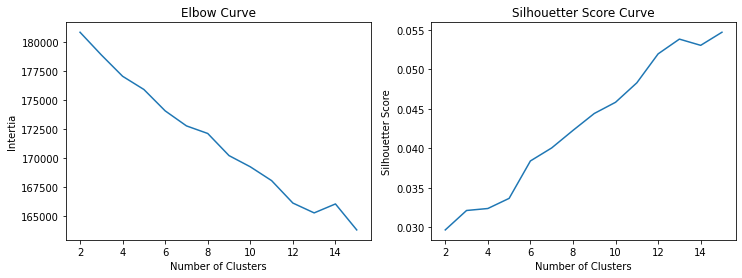

In [ ]:
fig, ax = pyplot.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')
# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

Como es posible observar, no se muestra en ningún momento un cambio sustancial en la pendiente de la curva, por lo que no es claro dónde se ubica el codo.
Esto es natural debido a la alta dimensionalidad del dataframe con que se trabaja, razón por la cual la verificación se realizó previamente de manera manual con el algoritmo LDA. En ese caso, definiendo un número de clusters = 5, se obtuvieron resultados bastante aceptables, que permitieron intuir de cierta manera algunas de las temáticas presentes en la discusión virtual.
Para contrastar resultados, se realizará entonces el algoritmo K-means con K=5.

En el bloque a continuación se implementa el algoritmo de K-means con 5 clusters. Se extraen las palabras más comunes de cada cluster para así identificar la temática subyacente en cada uno y además se incluye el número total de tweets que componen cada cluster, para así conocer el tamaño de cada uno.

In [ ]:
#Ahora con el clustering.
#K-Means 
num_clusters = 5
km = KMeans(n_clusters=num_clusters,n_init=20)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

tweets = { 'texto': vocab_frame['words'] , 'cluster': clusters}
frame = pd.DataFrame(tweets, columns = ['texto', 'cluster'])
frame.reset_index()

#Número de tweets por cluster
print('Número de tweets en cada cluster:')
print(frame['cluster'].value_counts())

#Podemos ver las palabras más frecuentes en cada cluster para saber lo que describe cada uno.

n = 5 #Aqui ponemos cuantas palabras ver por cluster
for i in range(num_clusters):
  cluster_i = frame[frame['cluster'] == i]
  cluster_i = cluster_i['texto'].tolist()
  palabras_del_cluster=[palabra for elemento in cluster_i for palabra in elemento]
  mas_comunes_del_cluster=Counter(palabras_del_cluster).most_common(n)
  print('Las '+ str(n) + ' más comunes del cluster ' + str(i) + ' son: ' + str(mas_comunes_del_cluster))

Número de tweets en cada cluster:
0    157092
1     16052
2     10393
4      8413
3      8050
Name: cluster, dtype: int64
Las 5 más comunes del cluster 0 son: [('need', 9789), ('home', 8348), ('help', 8239), ('time', 8064), ('stay', 7782)]
Las 5 más comunes del cluster 1 son: [('people', 18292), ('need', 1888), ('help', 1391), ('like', 1304), ('home', 1272)]
Las 5 más comunes del cluster 2 son: [('case', 12082), ('death', 5508), ('new', 4079), ('confirm', 2709), ('report', 2011)]
Las 5 más comunes del cluster 3 son: [('test', 7128), ('testing', 3113), ('positive', 2528), ('people', 888), ('case', 615)]
Las 5 más comunes del cluster 4 son: [('china', 5548), ('realdonaldtrump', 4163), ('trump', 1040), ('world', 911), ('country', 591)]


Aqui notamos de inmediato que hay un cluster de tamaño considerablemente mayor que los otros, por lo que se aprecia una clara tendencia en los tweets estudiados que agrupa a la gran mayoría de ellos. 

Para observar con mayor detalle el contenido temático de cada cluster obtenido, y así poder determinar las tendencias dominantes en los tweets estudiados, se grafica la frecuencia de las palabras más utilizadas en cada cluster.

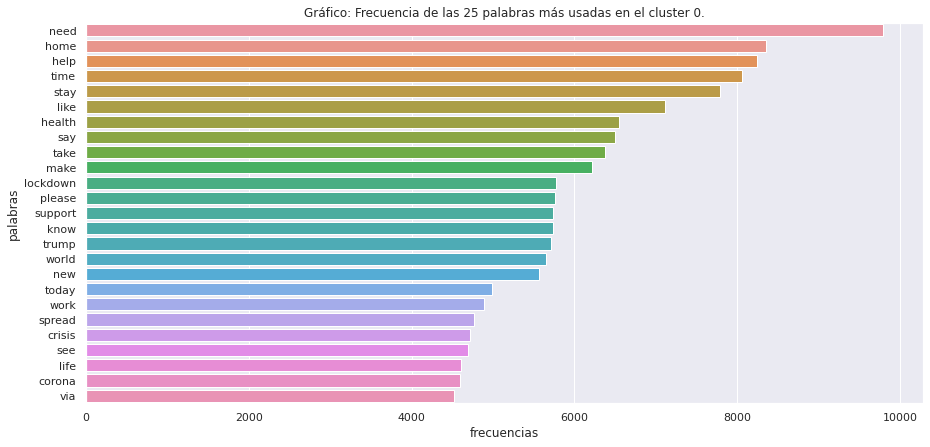

In [ ]:
clase0= frame[frame['cluster'] == 0]
lista_0= clase0['texto'].tolist()
texto0= []
for elemento in lista_0:
    valor= str(" ").join(elemento)
    texto0.append(valor)
df_clase0= pd.DataFrame(texto0)

#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in df_clase0[0] for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico: Frecuencia de las 25 palabras más usadas en el cluster 0.")
pyplot.savefig('wordcount_bar.png')

El Cluster 0 es el más grande de todos en número de elementos, acaparando aproximadamente el $78\%$ del total de datos. Dado que abarca una enorme cantidad de tweets podemos notar en el gráfico que hay muchas palabras con frecuencias altas.

Las primeras palabras de la lista denotan un resultado relativamente esperable. Se pueden notar palabras que, aunque de forma aislada no dicen mucho, al considerarlas juntas en un mismo tweet se devela su temática, como  *time*, *stay* y *home*. Se puede interpretar que los tweeteros estarían frecuentando la temática de quedarse en casa durante estos tiempos de pandemia.

Se observa una altísima dominancia de la palabra *need*, la más presente en los tweets de este cluster, algo decidor sobre la temática del mismo, se podría pensar entonces que algunas de las palabras en la parte inferior de la lista están asociadas de alguna manera a una necesidad. También se menciona con una alta frecuencia al presidente de Estados Unidos, *trump*, a la palabra *help*, a la salud, *health*, verbos como *make* o *take* y acciones puntuales que podria tomar un gobierno, como *lockdown*. Este conjunto de palabras, junto con otras presentes en el gráfico, permite asociar estos tweets con demandas de la ciudadanía en el ámbito de la salud y las medidas de confinamiento que se han tomado en cada país.


De forma global, se observa que **el cluster 0 reune mensajes con temáticas relacionadas a las medidas de salubridad necesarias para evitar la propagación del virus**, ya sea a nivel personal como quedarse en casa, o a nivel más amplio como medidas tomadas de confinamiento por cada gobierno. Por otro lado, también se agrupan mensajes **relacionados a las necesidades y/o demandas de las personas durante tiempos de pandemia**. Como consecuencia de la gran variedad de opiniones y el revuelo que generó la pandemia, especialmente durante los meses estudiados, la temática de este cluster es preponderante el dataset estudiado y se puede clasificar como el tema más debatido en tweeter durante marzo y abril. La dimensión de este cluster y la falta de tendencias claras en el histograma presentado sugieren que sería útil realizar un nuevo proceso de minería de datos sobre este cluster en especifico, o bien ir aumentando el número de clusters del algoritmo para disgregar el presente cluster en diferentes temáticas más específicas.

Se observa una relación entre las palabras encontradas y por ende las temáticas definidas por éste cluster y el cluster 3 del algoritmo LDA, repitiéndose en ambos palabras como "help", "stay", "home", refiriéndose ambos entonces a temáticas relacionadas con las medidas de prevención.

Se observa una relación también con el cluster 1 del algoritmo LDA, con el cual comparten palabras como "help", "support", "health", "need". Es importante destacar que el tamaño de este cluster hace que en el aparezcan variadas temáticas. Por lo demás, los clusters 2 y 3 del algoritmo LDA eran bastante cercanos, compartiendo varias palabras, por lo que no resulta extraño que en este caso se tenga similitudes con ambos.


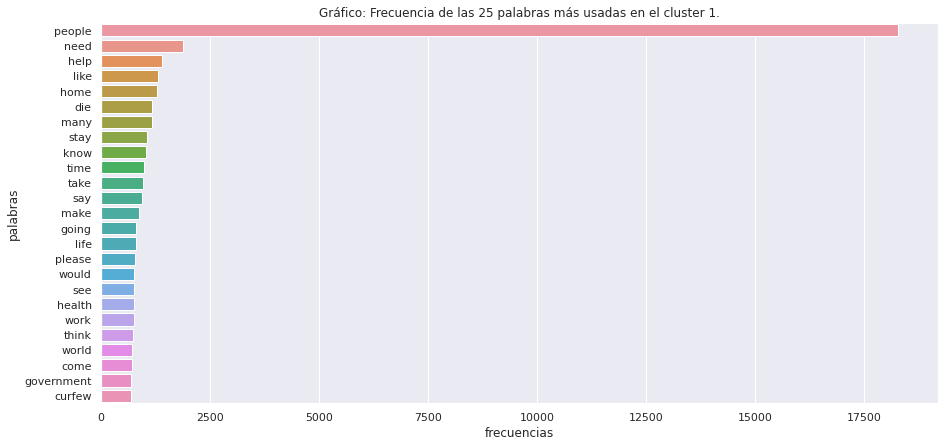

In [ ]:
clase1= frame[frame['cluster'] == 1]
lista_1= clase1['texto'].tolist()
texto1= []
for elemento in lista_1:
    valor= str(" ").join(elemento)
    texto1.append(valor)
df_clase1= pd.DataFrame(texto1)

#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in df_clase1[0] for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico: Frecuencia de las 25 palabras más usadas en el cluster 1.")
pyplot.savefig('wordcount_bar.png')

Este cluster agrupa a más del $8\%$ de los datos y la palabra *people* tiene una frecuencia altísima, de hecho, es la frecuencia más alta para una palabra individual en cualquiera de los clusters generados. Por otro lado, las demás palabras que lo componen tiene frecuencias notoriamente bajas. Dado lo anterior, y la generalidad de la palabra *people*, es que se hace complejo determinar una temática puntual que describa este cluster.

No obstante, una posible interpretación es que este cluster agrupa mensajes que en su estructura contienen la palabra *people*.  Es posible que sean mensajes que buscan dar a conocer situaciones que están relacionadas con la gente en general, expresar sentimientos colectivos con respecto a la pandemia, o bien, apuntan a ser leidos por una amplia cantidad de personas, por lo que se refiere a la "gente" o al "pueblo" al momento de escribir el tweet. 

Esto se justifica por la presencia de una gran variedad verbos cuyo uso junto a *people* tiene sentido en los contextos mencionados anteriormente (*like*, *die*, *know*, *going*, *think*, *want*, etc). En resumen, y dada la gran cantidad de verbos presentes en el histograma, se concluye que **el cluster 1 habla sobre acciones, pensamientos o situaciones que, a juicio de quien escribe el tweet, afectan de alguna manera a algún colectivo de personas (*people*) durante la cuarentena**, sin embargo, es el cluster más dificil de interpretar de todos los generados. Lo importante es reconocer una colectividad en este tipo de mensaje, el usuario de la red está enfrentandose o refiriéndose a un colectivo, lo cual habla en parte de lo trascendental que ha llegado a ser la pandemia del coronavirus.

Comparando con el clustering obtenido del algoritmo LDA, se puede observar una clara relación con el cluster número 2. En ambos la palabra más frecuente es "people" por un amplio margen, y el resto de las palabras parecen ser verbos relacionados con esta. Ambos dan cuenta de comentarios alusivos a una comunidad.

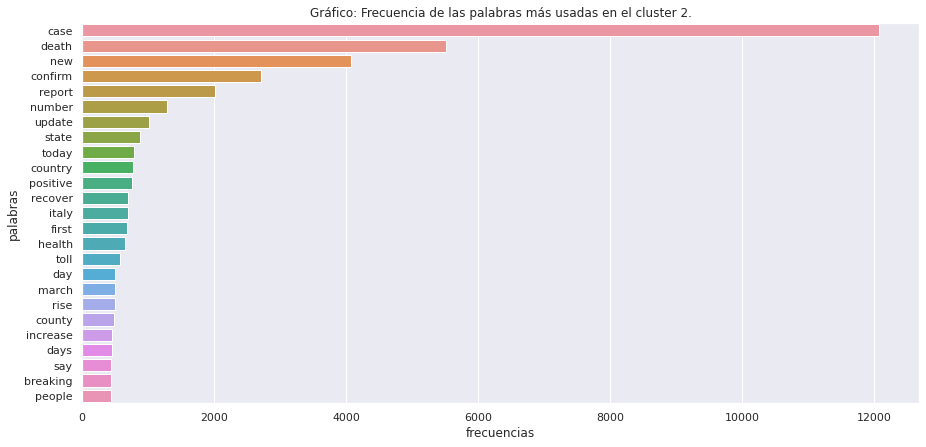

In [ ]:
clase2= frame[frame['cluster'] == 2]
lista_2= clase2['texto'].tolist()
texto2= []
for elemento in lista_2:
    valor= str(" ").join(elemento)
    texto2.append(valor)
df_clase2= pd.DataFrame(texto2)


#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in df_clase2[0] for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico: Frecuencia de las palabras más usadas en el cluster 2.")
pyplot.savefig('wordcount_bar.png')

Este cluster contiene al $5\%$ del total de tweets analizados y la temática que agrupa corresponde a una de las que se esperaba encontrar desde antes de hacer el clustering, los tweets informativos. Las palabras más frecuentes de este cluster dejan en claro que aquí están contenidos los mensajes que buscan mantener actualizados a los usuarios de tweeter en lo que respecta al número de nuevos contagios confirmados de coronavirus, el número de fallecidos, y de recuperados (palabras como *update*, *report*, *new*, *case*, *confirm*, *death*, *number*). En los meses de estudio la pandemia estaba recién comenzando y era la gran noticia del momento (*breaking*, *today*), tenia mayor fuerza en Italia, que está presente en el gráfico, y los contagios en general iban al alza (*rise*). Este cluster es sin duda el más claro de todos y se pudo notar ya que sin importar los parámetros de la DTM, ni el número de clusters, ni cuantas veces se ejecutara el algoritmo, k-means siempre lo encontraba de forma clara y precisa.

Finalmente, **el cluster 2 agrupa tweets cuya temática se relaciona a las estadísticas relativas a la propagación de la pandemia.** Además, se puede afirmar que esta es la agrupación que mejor se puede identificar dentro de los tweets estudiados.

El cluster 5 encontrado por el algoritmo LDA tiene la temática en común de tratar estadísticas sobre la pandemia. Palabras como "case", "new", "death", son compartidas por ambos.





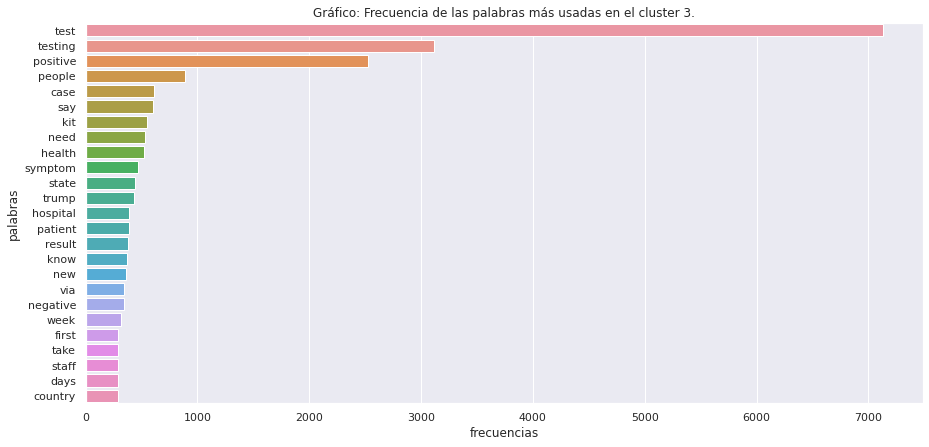

In [ ]:
clase3= frame[frame['cluster'] == 3]
lista_3= clase3['texto'].tolist()
texto3= []
for elemento in lista_3:
    valor= str(" ").join(elemento)
    texto3.append(valor)
df_clase3= pd.DataFrame(texto3)


#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in df_clase3[0] for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico: Frecuencia de las palabras más usadas en el cluster 3.")
pyplot.savefig('wordcount_bar.png')

El cluster 3, con tan solo el $4\%$ del total, es el con menor cantidad de tweets y presenta una dominancia muy marcada por referencias a los tests de COVID-19 y especialmente a aquellos que resultan positivos. Este tipo de mensajes se pueden asociar a diferentes formas de referirse a los test. Se observa entonces que en este cluster se reúnen tweets al parecer informativos en su mayoría, que comentan en particular los test positivos con bastante frecuencia. 
Por la naturaleza de la red social, se podría esperar que alguno de los tweets abarcados en este cluster, se refieran a personajes famosos que han contraido el virus o a información de número de casos y desean compartir esta información con el mundo. Es interesante además la presencia de la palabra *via*, que suele ser utilizada en redes sociales cuando se comparten noticias cuya fuente viene de algún otro medio de comunicación creible (por ejemplo, *Tom Hanks tested positive for coronavirus, via CNN*).

También se destacan palabras como *case*, *synthom*, *pacient*, *result*, *negative*. **Una de las temáticas de los tweets incluidos en el cluster 3 se podría identificar como datos concretos sobre la propagación del virus, con un fuerte énfasis en los test positivos.**

Esta temática también es tocada en los resultados obtenidos del algoritmo LDA, en el cluster 5, que reúne palabras relacionadas con la estadística de propagación. 


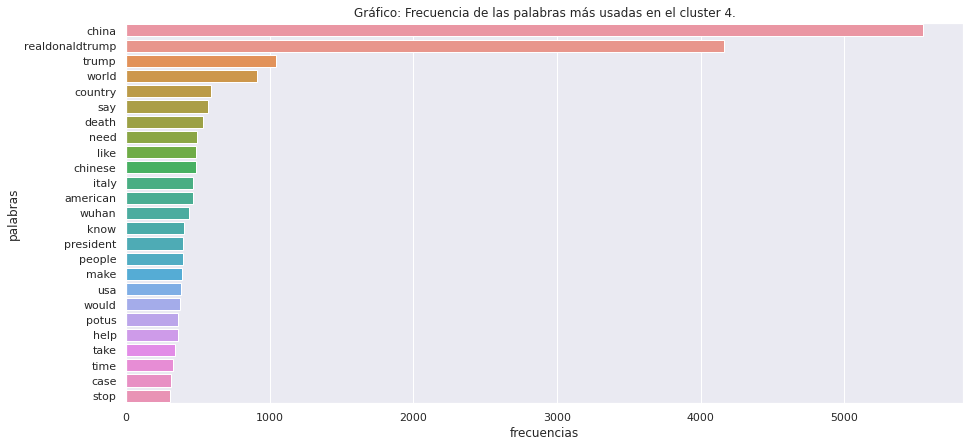

In [ ]:
clase4= frame[frame['cluster'] == 4]
lista_4= clase4['texto'].tolist()
texto4= []
for elemento in lista_4:
    valor= str(" ").join(elemento)
    texto4.append(valor)
df_clase4= pd.DataFrame(texto4)


#Agregar todas las palabras a una lista
lista_palabras=[palabra for linea in df_clase4[0] for palabra in linea.split()]                              #Se agregan todas las palabras a una lista para poder graficarlas
lista_palabras[:5]

#Graficar frecuencia de palabras
sns.set(style="darkgrid")
counts = Counter(lista_palabras).most_common(25)                                                               #Top 50 de palabras más repetidas
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['palabras', 'frecuencias']

fig, ax = pyplot.subplots(figsize = (15, 7))
ax = sns.barplot(y="palabras", x='frecuencias', ax = ax, data=counts_df)
pyplot.title("Gráfico: Frecuencia de las palabras más usadas en el cluster 4.")
pyplot.savefig('wordcount_bar.png')

Este último cluster contiene al $5\%$ del total de datos y se conforma de mensajes cuyas palabras más frecuentes permiten inferir algún tipo de contenido político, ya que la mayoría de los tweets en estudio provienen de EEUU y dada la tensa relación que mantiene este país con China, especialmente luego de que la pandemia se originara en este último lugar. Durante los meses de marzo y abril se dieron una serie de acusaciones mutuas entre los gobiernos de ambos países, que se culpaban unos a otros por el origen de esta pandemia.  Dichas acusaciones causaron un gran revuelo en la población que se dedicó a discutir estos temas, y en especial por tweeter, que suele ser el lugar preferido de Donald Trump para publicar sus mensajes más polémicos. Esto convierte al presidente de los Estados Unidos en el más aludido dentro de este cluster (*realdonaldtrump*, *trump*, *potus*, *president*), que junto a la presencia de su principal rival en esta discusión, China (*china*, *chinese*, *wuhan*), permite concluir que el **cluster 4 agrupa a tweets con temáticas de política internacional, mayoritariamente entre China y Estados Unidos.**

En comparación al algoritmo LDA, el cluster 4 de este último se clasifico como relativo a la política o comentarios sobre los gobiernos de China y EEUU, por lo que se tiene esa similitud. Se comparten entre ambos palabras como "trump", "china", "realdonaldtrump", "world". 


Se puede observar que si bien los resultados obtenidos en ambos algoritmos no son los mismos, el objetivo de caracterizar de cierta manera algunas de las temáticas presentes en la discusión virtual por twitter relativa al coronavirus se logra bastante satisfactoriamente. Se han puesto sobre la mesa hasta el momento diversos temas de la discusión y se han enfatizado observaciones sobre los mismos.

A continuación, con los resultados obtenidos con el algoritmo K-means, se procederá a realizar un análisis de sentimientos por cada cluster, es decir, se graficarán los valores de sentimiento de los tweets clasificados en cada uno de ellos y se comentarán resultados interesantes.

##### Sentimientos por cluster (K-means)

A partir de los cluster obtenidos en el algoritmo K-means, procederemos a realizar el mismo análisis de sentimientos anteriormente descrito, pero esta vez para cada cluster. 
Así, se espera obtener información sobre el sentimiento asociado a cada temática, o cluster encontrado.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


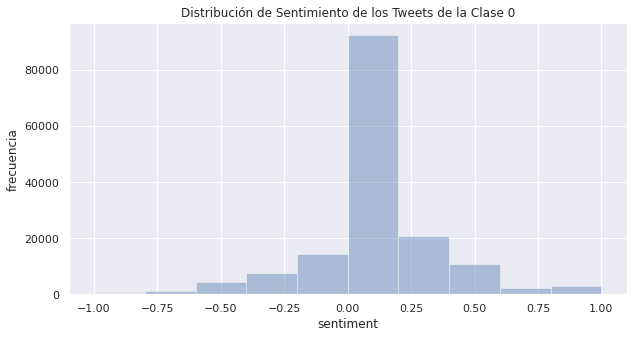

negative    27821
neutral     63048
positive    66223
Name: polarity, dtype: int64


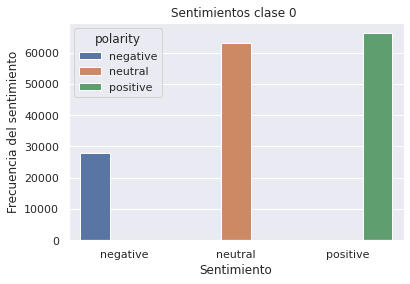

In [ ]:
import plotly.graph_objs as go
import nltk
import matplotlib.pyplot as plt
import plotly.graph_objs as go
nltk.download('punkt')
nltk.download('vader_lexicon')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df_clase0['sentiment'] = df_clase0[0].map(lambda texto: TextBlob(texto).sentiment.polarity)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de la Clase 0', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df_clase0['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df_clase0['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df_clase0['polarity'] = cut.values
df[['polarity','sentiment']][:20]

sent=df_clase0['polarity']
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Sentimientos clase 0 ')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)

cnt_ = df_clase0['polarity'].value_counts()
cnt_ = cnt_.sort_index()

fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de la clase 0",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de la clase 0",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de la clase 0",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)


Dentro de los tweets de la clase 0, los sentimientos preponderantes son positivos o neutros, con un $82.3\%$ de los datos clasificados entre estas dos clases. 

Es importante recalcar que este cluster es el más grande de todos, abarcando aproximadamente el $78\%$ del total de datos.

Comparando los sentimientos encontrados versus los encontrados para la totalidad de los datos, se evidencia que para el total, el porcentaje de tweets etiquetados como negativos era mayor, de un $20.2\%$, versus el $17.6\%$ del presente cluster.

Este cluster, como ya se comentó anteriormente, reúne en su mayoría mensajes con temáticas relacionadas con las medidas de salubridad para evitar la propagación del virus. Se puede inferir entonces, que la aceptación de este tipo de información en la red social es en general positiva, los usuarios que se refieren a esta temática, en general lo hacen expresándose de manera neutral o positiva. Se podría decir que se trata de una temática de consenso a nivel emocional.





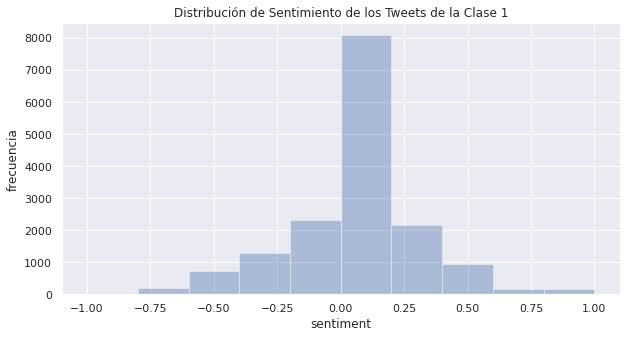

negative    4531
neutral     4316
positive    7205
Name: polarity, dtype: int64


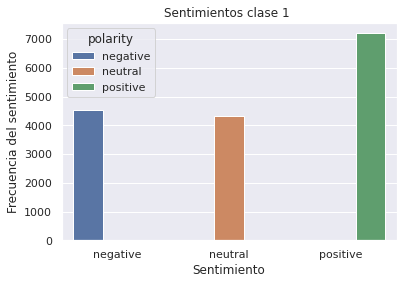

In [ ]:
df_clase1['sentiment'] = df_clase1[0].map(lambda texto: TextBlob(texto).sentiment.polarity)


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de la Clase 1', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df_clase1['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df_clase1['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df_clase1['polarity'] = cut.values
df[['polarity','sentiment']][:20]

sent=df_clase1['polarity']
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Sentimientos clase 1 ')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)


cnt_ = df_clase1['polarity'].value_counts()
cnt_= cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de la clase 1",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de la clase 1",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de la clase 1",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)


Los sentimientos presentes en el cluster 1 están dominados por la positividad, que abarca a casi el $45\%$ de los tweets. Sin embargo, el número de mensajes neutrales disminuye para cederle espacio a los tweets negativos, que en este cluster presentan un aumento cercano al $7\%$ en comparación con el porcentaje de tweets negativos que se obtuvo al analizar el dataset completo. Por otro lado, el sentimiento predominante sigue siendo la positividad.

Recordando que el cluster 1 habla sobre situaciones vividas por la "gente" durante la cuarentena, tiene sentido encontrar una disminución de los tweets con sentimiento neutral, que cae un $5\%$ al comparar con los resultados para el dataset entero. Esto se puede explicar ya que cuando se desea compartir una situación que está viviendo la gente, en general es porque se trata de algo muy bueno o muy malo, si fuese algo neutral simplemente no se compartiría.

Se observa que este es un cluster que se aleja un poco del área informativa y puede ser un tanto más subjetivo, hablando de temáticas relativas al vivir de la gente de manera polarizada.

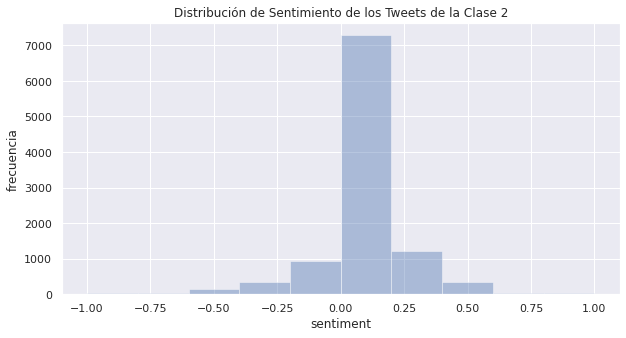

negative    1445
neutral     3443
positive    5505
Name: polarity, dtype: int64


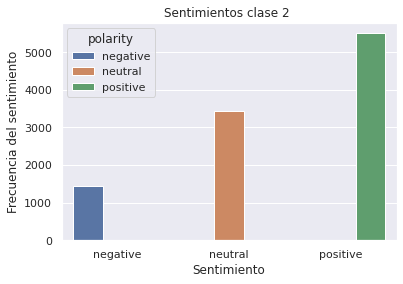

In [ ]:
df_clase2['sentiment'] = df_clase2[0].map(lambda texto: TextBlob(texto).sentiment.polarity)



fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de la Clase 2', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df_clase2['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df_clase2['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df_clase2['polarity'] = cut.values
df[['polarity','sentiment']][:20]

sent=df_clase2['polarity']
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Sentimientos clase 2 ')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)


cnt_ = df_clase2['polarity'].value_counts()
cnt_= cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de la clase 2",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de la clase 2",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de la clase 2",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)




El cluster 2 agrupa a aquellos mensajes informativos, que buscan actualizar las cifras de contagios, de fallecidos o de recuperados de coronavirus, por lo que sería esperable que predominen los sentimientos neutrales, ya que estos tweets suelen ser de caracter objetivo y contienen sólo datos, o bien podriamos esperar que predomine la negatividad ya que lo que se informa son estadísticas lamentables de personas que sufren enfermedad o muerte. No obstante, el sentimiento que predomina es la positividad, que dentro de este cluster aumenta en 6 puntos porcentuales si se compara con el porcentaje de positividad encontrado para el dataset completo. Esos 6 puntos provienen de los sentimientos negativos, que en este cluster disminuyen en $6\%$ en comparación con el dataset completo.

Se observa entonces, de manera un tanto sorprendente, que en aquellos tweets que en su mayoría se refieren a las estadísticas relativas a la propagación de la pandemia, el sentimiento del usuario al respecto tiende a ser positivo. 


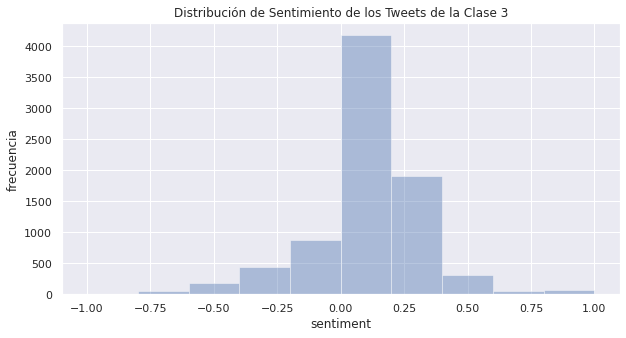

negative    1526
neutral     2137
positive    4387
Name: polarity, dtype: int64


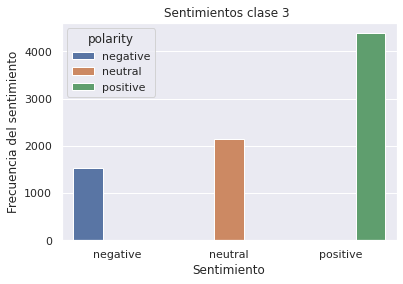

In [ ]:

df_clase3['sentiment'] = df_clase3[0].map(lambda texto: TextBlob(texto).sentiment.polarity)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de la Clase 3', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df_clase3['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df_clase3['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df_clase3['polarity'] = cut.values
df[['polarity','sentiment']][:20]

sent=df_clase3['polarity']
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Sentimientos clase 3 ')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)

cnt_ = df_clase3['polarity'].value_counts()
cnt_ = cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de la clase 3",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de la clase 3",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de la clase 3",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)

Una de las temáticas de los tweets incluidos en el cluster 3 fue definida como datos concretos sobre la propagación del virus, con un fuerte énfasis en los test positivos, algo parecido al cluster 2 .

La temática del cluster 3 es de cierta forma similar a la del cluster 2, y sus resultados en lo que respecta a análisis de sentimientos también lo son. La gran diferencia aqui es que la neutralidad cae aproximadamente en 7 puntos porcentuales, mientras que la negatividad aumenta en 5.

Cabe destacar que el énfasis de las estadísticas reunidas en este cluster eran los test positivos, una estadística bastante preocupante en aquellas fechas y que puede explicar de alguna manera el aumento de la negatividad del cluster.



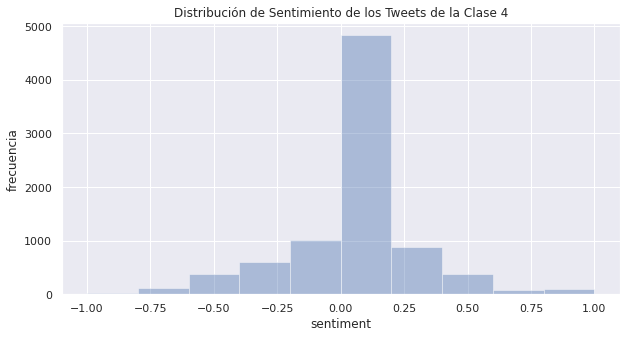

negative    2113
neutral     3196
positive    3104
Name: polarity, dtype: int64


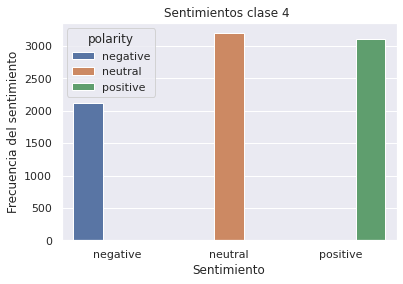

In [ ]:
df_clase4['sentiment'] = df_clase4[0].map(lambda texto: TextBlob(texto).sentiment.polarity)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de la Clase 4', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(df_clase4['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

#Mapa de sentimiento según la polaridad
cut = pd.cut(
    df_clase4['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df_clase4['polarity'] = cut.values
df[['polarity','sentiment']][:20]

sent=df_clase4['polarity']#
sent=pd.DataFrame(sent)
sent_count=sent.groupby(['polarity']).size().reset_index(name='count')
sent_count.columns=['polarity','frecuencia']
sns.barplot(x='polarity',y='frecuencia',hue='polarity',data=sent_count)
pyplot.title('Sentimientos clase 4 ')
pyplot.xlabel('Sentimiento', fontsize=12)
pyplot.ylabel('Frecuencia del sentimiento', fontsize=12)


cnt_ = df_clase4['polarity'].value_counts()
cnt_ = cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de la clase 4",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de la clase 4",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de la clase 4",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)



El cluster político presenta sentimientos muy interesantes. La positividad cae de forma radical, de un $47\%$ en el dataset completo hasta un $38\%$, para darle paso a un aumento de 5 puntos porcentuales a la negatividad y de 4 puntos a la neutralidad dentro de este cluster.

La neutralidad se puede atribuir a tweets que informan de manera  objetiva sobre la situación política y las problematicas entre China y EEUU. El aumento de la negatividad es más interesante ya que permite notar que dentro de los que opinan de política en tweeter los sentimientos negativos son mayores que para el promedio, lo cual puede indicar descontento al expresar este tipo de opiniones.

Finalmente y en referencia al análisis de todos los clusters, el resultado más inesperado es la gran dominancia de los tweets clasificados como positivos. En el contexto de pandemia sería razonable pensar que la negatividad florece, sin embargo, la naturaleza de las redes sociales muchas veces evita que se propage la negativadad y en cambio favorece mostrar los mejores aspectos de nuestra vida, este fenómeno podria ser una posible justificación al contrainituitivo hecho de haber encontrado una predominancia de la positividad.

### Análisis por país

Ahora se busca repetir el Análisis realizado anteriormente en diversos países de interés. Se eligieron tres países, pero es perfectamente adaptable a un mayor número de ellos.

Alguna de las considerciones que se tuvieron en cuenta para la elección de los países fue que hubiesen suficientes datos de los mismos, que fuesen países con diferencias culturales/geográficas importantes y por último, que el manejo de la pandemia en cada uno de ellos haya sido diferente.

Los países elegidos fueron: Estados Unidos (Norte América), Australia (Oceanía) e India (Asia).

En cada país se puede repetir cada una de las partes del análisis ya presentado, pero para ser más concisos se realizará únicamente un análsis de sentimiento del país en general y un clustering mediante el algoritmo LDA. El método de clustering k-means y un análisis de sentimientos de cada cluster, como se presento en el caso del dataset en general se dejarán propuestos. 

Una de las razones de lo anterior es que al restringir el análisis por países, la cantidad de datos disponibles disminuye considerablemente, más aún la cantidad de tweets clasificados en cada cluster, por lo que se cree que no se disponen los suficientes datos como para realizar un análisis concluyente sobre el sentimiento de cada cluster.


Se filtra el dataframe original por país.

In [ ]:
sent_us=df[df['country_code']=='US'][['country_code','polarity','sentiment']] #Sentimientos US
sent_in=df[df['country_code']=='IN'][['country_code','polarity','sentiment']] #Sentimientos India
sent_au=df[df['country_code']=='AU'][['country_code','polarity','sentiment']] #Sentimientos Australia

print(sent_us.head(10))

         country_code  polarity  sentiment
403213             US   neutral   0.000000
2433380            US  positive   0.100000
4001838            US  positive   0.136364
961755             US  positive   0.370536
7417276            US  positive   0.240000
6792678            US  positive   0.500000
8183461            US   neutral   0.000000
10249283           US  positive   0.312500
10459057           US  positive   0.300000
6646965            US   neutral   0.000000


#### Estados unidos

##### Análisis de Sentimientos

Se analizó los sentimientos de Estados Unidos, el primer país con más tweets en el dataset. De ello se desprende que el sentimiento predominante es el positivo, seguido de neutral y finalmente negativo.

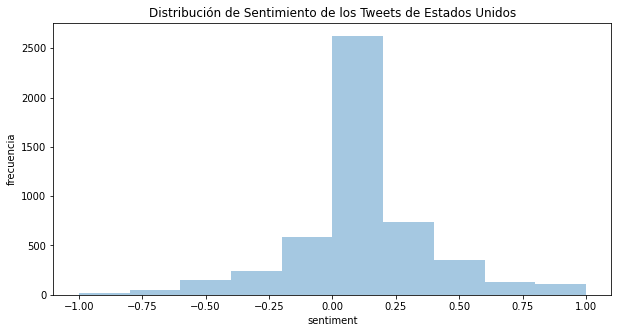

negative    1038
neutral     1603
positive    2364
Name: polarity, dtype: int64


<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de Estados Unidos', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(sent_us['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

cnt_ = sent_us['polarity'].value_counts()
cnt_ = cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de Estados Unidos",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de Estados Unidos",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de Estados Unidos",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)


Al comparar los porcentajes de polaridad encontrados en el dataset filtrado para tweets con ubicación en Estados Unidos, se observa que en general la distibución es bastante similar al caso del análisis general. Esto es de esperar, producto que la gran mayoría de tweets son provenientes de éste país. Cabe recordar que en el caso del análsis de sentimientos para el dataset completo los porcentajes eran positividad: $47%$, negatividad $20.2%$ y neutralidad $32%$. No está demás mencionar que hay un gran porcentaje de tweets etiquetados como negativos, lo cual puede responder a un descontento generalizado del usuario de dicha ubicación.



##### Clustering

In [ ]:
#Limpieza de caracteres del texto

df_us= df[df['country_code']=='US']   


text_df_us=df_us['text']                                                                                               #Extraer solo columna de texto
text_lr_us = text_df_us.apply(lambda x: re.sub(r"https\S+", "", x))                                                    #Eliminar enlaces del tweet
text_lr_lc_us = text_lr_us.apply(lambda x: x.lower())                                                                  #Pasar todo el texto a miniusculas
text_lr_lc_pr_us = text_lr_lc_us.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))               #Remover signos de puntuacion
text_lr_lc_pr_n_us=text_lr_lc_pr_us.replace(r'\n',  ' ', regex=True)                                                   #Eliminar saltos de linea \n
texto_limpio_us=text_lr_lc_pr_n_us                                                                                     #Variable "global" de texto limpio
del text_lr_us, text_lr_lc_us, text_lr_lc_pr_us, text_lr_lc_pr_n_us

#Eliminar stopwords de todos los textos

nltk.download('stopwords') 
stop_words_en=set(stopwords.words('english'))  
stop_words_en.update(['si','q','va','aqui','asi','da','1','2','3','covid19','coronavirus','pandemia','virus','coronaviruspandemic','coronavid19','hoy','ser','así','solo','coronavirusespana',\
                      'coronavirusoutbreak','covid2019','coronaalert','total','coronaoutbreak','india','covid2019','amp','covid','due','dont','get','34','still','sarscov2','covidー19','it´s',\
                      'its','much','thats','one','4','pandemic','i’ll','don’t'])
sw=stop_words_en
texto_limpio_sw_us=texto_limpio_us.apply(lambda x: ' '.join([word for word in x.split() if word not in sw])) #Eliminar stopwords de los textos limpios


#Tokens
lista_texto_us=texto_limpio_sw_us.to_numpy()

text_data_us=[] #Lista donde se guardan los tokens y stem de los textos.
for i in range(len(lista_texto_us)): #Se tokeniza cada tweet
  tokenized=prepare_text_for_lda(lista_texto_us[i])
  text_data_us.append(tokenized)

#LDA

#OBTENER DIFERENTES TEMATICAS
dictionary = corpora.Dictionary(text_data_us)
corpus = [dictionary.doc2bow(text) for text in text_data]

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

NUM_TOPICS = 5 #Numero de topicos a encontrar
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4) #Numero de palabras por topico
for topic in topics:
    print(topic)

#VISUALIZACION TEMATICAS POR PALABRA
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(0, '0.014*"help" + 0.014*"health" + 0.013*"need" + 0.010*"crisis"')
(1, '0.011*"close" + 0.010*"new" + 0.009*"school" + 0.008*"via"')
(2, '0.019*"people" + 0.014*"stay" + 0.014*"home" + 0.012*"like"')
(3, '0.051*"case" + 0.033*"death" + 0.026*"new" + 0.014*"report"')
(4, '0.019*"trump" + 0.019*"test" + 0.014*"say" + 0.012*"realdonaldtrump"')


A partir del clustering realizado, se observa que en realidad es bastante parecido al obtenido anteriormente para el caso del dataset completo. 
Se observa un cluster informativo sobre las estadísitcas de la pantemia, en este caso el número 4. También aquel con la frecuencia muy alta de la palabra "people", en este caso el número 3. Se repite también la temática de la salud y las medidas de prevención en el cluster 1, y aparece un cluster de temáticas mayoritariamente políticas, el número 5. 
En el cluster número 2 no es tan identificable con los anteriormente presentados. Sus palabras principales son "close", "new", "school", "via", "video", "check", "read", "today", "check", "update". Se puede inferir que nuevamente trata de temas informatidos sobre la pandemia, con palabras frecuentes para los medios periodísticos.

#### Australia

##### Análisis de Sentimientos

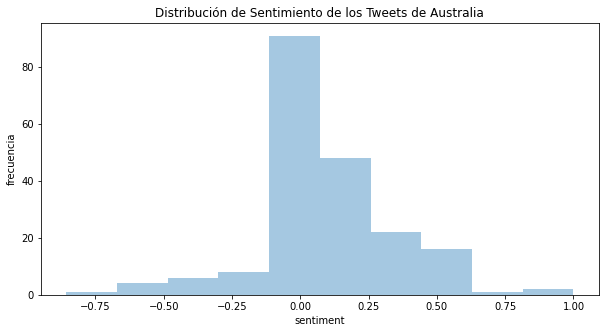

negative     40
neutral      59
positive    100
Name: polarity, dtype: int64


<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de Australia', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(sent_au['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

cnt_ = sent_au['polarity'].value_counts()
cnt_ = cnt_.sort_index()

fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de Australia",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de Australia",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de Australia",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)

En los tweets con ubicación en Australia, se observa que el porcentaje de tweets neutrales se mantiene casi idéntico al caso de Estados Unidos, sin embargo hay una diferencia de 3 puntos de aumento de los tweets con polaridad positiva en desmedro de aquellos con polaridad negativa.
Según un estudio publicado por la revista Time, Australia es uno de los 11 países que ha respondido mejor a la pandemia en el mundo, algo quizás relevante al intentar entender este cambio.
De todas maneras el cambio no es muy notorio, y habría que realizar un análisis con mayor cantidad de tweets etiquetados en esta ubicación para poder ser concluyente, son solamente 199 tweets etiquetados.


https://time.com/5851633/best-global-responses-covid-19/

##### Clustering

Debido a la poca cantidad de tweets, realizar clustering a partir de ellos no es algo productivo, por lo que el análsis queda propuesto como proyección de la investigación.

#### India

##### Análisis de Sentimientos

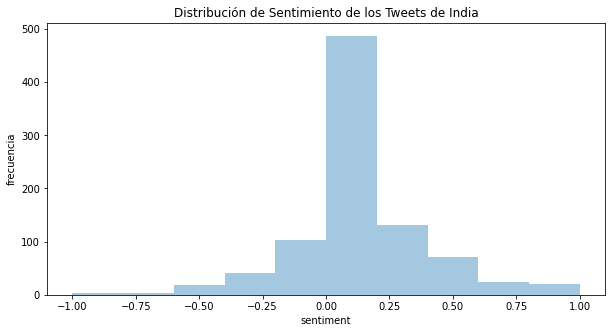

negative    170
neutral     309
positive    425
Name: polarity, dtype: int64


<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.set(title='Distribución de Sentimiento de los Tweets de India', xlabel='polaridad', ylabel='frecuencia')
sns.distplot(sent_in['sentiment'],kde=False,norm_hist=False,bins=10, ax=ax)
plt.show()
plt.savefig('sentiment_distribution.png')

cnt_ = sent_in['polarity'].value_counts()
cnt_ = cnt_.sort_index()


fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Polaridad de los tweets de India",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Polaridad de los tweets de India",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Porcentaje de polaridad de los Tweets de India",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
print(cnt_)

El porcentaje de tweets positivos se mantiene bastante parecido al caso de Estados Unidos, por debajo del porcentaje de Austalia, sin embargo, hay un aumento de los tweets neutrales en desmedro de aquellos de polaridad negativa. El porcentaje de tweets neutrales aumenta en un 2.2 puntos porcentuales versus el caso de Estados Unidos.

Es importante mencionar que en este caso nuevamente la cantidad de tweets etiquetados en esta ubicación es bastante menor. Resulta sorprendente el observar que independiente del país (todos de distintas latitudes, economías y afectaciones por la pandemia), los porcentajes de polaridad no varían considerablemente. 

A partir de estas observaciones, se puede inferir como hipótesis que el público que frecuenta las redes sociales le da un uso más bien homogéneo a la misma entre los diversos países, y en realidad hay una globalización bastante fuerte reflejada en la red social. De todas maneras se trata de una hipótesis basada en una exploración bastante preeliminar, una proyección podría ser profundizar al respecto de la mano de más datos, y agregando países hispanoparlantes.

#####   Clustering

Si bien la cantidad de tweets no son suficientes como para realizar un clustering realmente significativo, se presentan de todas maneras los resultados obtenidos más que nada para comentar algunos términos interesantes. 

In [ ]:
#Limpieza de caracteres del texto

df_in= df[df['country_code']=='IN']   


text_df_in=df_in['text']                                                                                               #Extraer solo columna de texto
text_lr_in = text_df_in.apply(lambda x: re.sub(r"https\S+", "", x))                                                    #Eliminar enlaces del tweet
text_lr_lc_in = text_lr_in.apply(lambda x: x.lower())                                                                  #Pasar todo el texto a miniusculas
text_lr_lc_pr_in = text_lr_lc_in.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))               #Remover signos de puntuacion
text_lr_lc_pr_n_in=text_lr_lc_pr_in.replace(r'\n',  ' ', regex=True)                                                   #Eliminar saltos de linea \n
texto_limpio_in=text_lr_lc_pr_n_in                                                                                     #Variable "global" de texto limpio
del text_lr_in, text_lr_lc_in, text_lr_lc_pr_in, text_lr_lc_pr_n_in

#Eliminar stopwords de todos los textos

nltk.download('stopwords') 
stop_words_en=set(stopwords.words('english'))  
stop_words_en.update(['si','q','va','aqui','asi','da','1','2','3','covid19','coronavirus','pandemia','virus','coronaviruspandemic','coronavid19','hoy','ser','así','solo','coronavirusespana',\
                      'coronavirusoutbreak','covid2019','coronaalert','total','coronaoutbreak','india','covid2019','amp','covid','due','dont','get','34','still','sarscov2','covidー19','it´s',\
                      'its','much','thats','one','4','pandemic','i’ll','don’t'])
sw=stop_words_en
texto_limpio_sw_in=texto_limpio_in.apply(lambda x: ' '.join([word for word in x.split() if word not in sw])) #Eliminar stopwords de los textos limpios


#Tokens
lista_texto_in=texto_limpio_sw_in.to_numpy()

text_data_in=[] #Lista donde se guardan los tokens y stem de los textos.
for i in range(len(lista_texto_in)): #Se tokeniza cada tweet
  tokenized=prepare_text_for_lda(lista_texto_in[i])
  text_data_in.append(tokenized)

#LDA

#OBTENER DIFERENTES TEMATICAS
dictionary = corpora.Dictionary(text_data_in)
corpus = [dictionary.doc2bow(text) for text in text_data_in]

pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

NUM_TOPICS = 5 #Numero de topicos a encontrar
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4) #Numero de palabras por topico
for topic in topics:
    print(topic)

#VISUALIZACION TEMATICAS POR PALABRA
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(0, '0.012*"stay" + 0.010*"away" + 0.010*"fight" + 0.008*"country"')
(1, '0.025*"people" + 0.019*"curfew" + 0.013*"narendramodi" + 0.013*"janta"')
(2, '0.021*"stay" + 0.014*"home" + 0.011*"corona" + 0.011*"way"')
(3, '0.009*"please" + 0.009*"infection" + 0.009*"let" + 0.009*"fight"')
(4, '0.011*"food" + 0.009*"people" + 0.009*"need" + 0.009*"corona"')


Dentro de las frecuencias más nombradas del dataset completo aparecen palabras comunes con el análiss general, como "stay", "home", "support" y "community", se observa que la idea del uso de la plataforma twitter como una herramienta comunitaria se mantiene. 

Se observan bastantes palabras realcionadas con "india" que en el dataset original no eran frecuentes y algunas palabras que no están en inglés. Sorprenden además la aparición de las palabras "food" y "god" con altas frecuencias, algo que no se vió en el caso del análisis de frecuencia en general para Estados Unidos. Esto denota que hay otras temáticas presentes de manera masiva en la red además de aquellas compartidas por todos los países.

##**Conclusiones, lecciones y futuras direcciones**

Con el presente informe, se considera logrado el objetivo principal del proyecto, que dice relación con la obtención de experiencia en el manejo de diferentes técnicas, métodos y algoritmos relativos a la Minería de Datos. Se obtuvieron aprendizajes importantes acerca de la metodología de investigación del área, así como acerca de diversos algoritmos de clasificación y clustering. En este sentido, una de las lecciones más importantes y a su vez generales obtenidas fue el aprender a recabar información implícita a partir de datasets de cualquier tipo, habilidad relevante y distintiva en la formación profesional del área de la Ingeniería.

Para comentar en específico los resultados obtenidos del análisis, se hace imperante volver a mencionar cuáles fueron las preguntas que inicialmente motivaron el desarrollo de la investigación y cuáles fueron las hipótesis que como grupo se plantearon al respecto. A partir de cada una de ellas se realizará una crítica del trabajo realizado y se comentarán futuras direcciones.

- ¿Cómo se vincula la esfera emocional de los ciudadanos con el contexto actual de pandemia? La hipótesis planteada fue que la preocupación y los sentimientos negativos sobretodo predominarán en lo que respecta al virus.

Para aproximarse a una respuesta a esta pregunta, se realizó un análisis de sentimientos del dataset completo, encontrando para sorpresa de la investigación, que los comentarios negativos eran un porcentaje bastante acotado, sólo 20.2 puntos porcentuales respecto al total de tweets. 
Se observó además que el comportamiento temporal de la variable de polaridad de los sentimientos era bastante centrado en comentarios neutros, con abruptos saltos positivos y negativos en determinados momentos. Esto habla de la forma de comportarse de los usuarios de la red twitter y no deja de ser sorprendente de notar.


- ¿Cuáles son las distintas temáticas en que se clasifican los tweets analizados y qué sentimientos se asocian a cada temática? La hipótesis planteada fue que algunas de las temáticas posibles de identificar son temas relacionados con política, salud, cosas relativas al hogar, entre otras.

Para un análisis de la presente pregunta, se realizaron dos algoritmos de clustering con el mismo número de clusters: LDA y K-means y se comentaron similitudes encontradas entre ambos a modo de validación de la herramienta utilizada. Se observó que en ambos algortimos había bastantes similitudes entre las temáticas que englobaban los clusters realizados, algunas de las cuales fueron temas políticos, de salud, de estadística de propagación, entre otros. 
Se observó muy fuertemente una preoponderancia de términos alusivos a una comunidad en la red, dando cuenta de la transversalidad del momento que se vive, un fenómeno bastante notable y único desde un punto de vista social, que se aborda desde el colectivo por parte de los usuarios.

Uno de los desafíos que se enfrentaron fue el problema de la alta dimensionalidad del clustering, lo que resulto en que el número de clusters definido no fuese posible esclarecer de manera rigurosa. Queda propuesto como desafío ahondar en un mayor número de cluster que podría revelar nuevas temáticas.
Sobre los sentimientos asociados a cada temática, se observaron en general resultados bastantes concordantes a la naturaleza de cada una de ellas, detalladas profundamente en la sección pertinente.



- ¿Cómo se replica este análisis a nivel de países? Se esperan encontrar diversos resultados dependiendo del país en que se emitan los comentarios.


Para responder la presente pregunta, se obtuvieron estadísticas del análsis de sentimientos por países y se compararon entre ellas, además de realizar en algunos casos un algoritmo de clustering con los datos disponibles. 
Se tomaron como sujetos de análisis tres países y se compararon los sentimientos asociados a cada ubicación. Si bien fue posible observar variaciones, la distribución de polaridades se mantuvo bastante similar entre países, lo que llevó a concluir una cierta homogeneidad del usuario de la aplicación, en un contexto que hay que entender de profunda globalización. Se observó una clara influencia de los tweets de Estados Unidos en el dataset completo, por ser el país más presente. 

Uno de los desafíos encontrados en esta parte fue la poca cantidad de datos etiquetados por ubicación, lo que imposibilitó un análisis de clusteing más profundo y poder repetir a su vez el análisis de sentimientos por cluster. La limitante de hardware fue que es importante recalcar en este sentido.

A modo de conclusión, se cree que el presente trabajo fue de profundo aprendizaje para los estudiantes como una primera aproximación a la investigación en Minería de Datos.

##**Futuras direcciones**

Si se tuviese más tiempo, en base a los concocimientos adquiridos, se podría explorar en


* Agregar análisis de sentimientos según las distintas caracterizaciones que entrega el dataset, como cuentas verificadas, tweets con mayor cantidad de retweets, o cuentas con mayor cantidad de seguidores.

* Comparación a nivel de sentimientos con otro dataset de tweets aleatorio (de otras fechas) posibles de extraer con python a través de la librería tweepy. Para esto el algoritmo que se elija para realizar la clasificación de sentimientos debe ser generalizable. 

**Aportes de cada integrante a la realización del Hito 3:**

 * Dataset, código (an. exploratorio + LDA), informe, voz, edición y montaje del video: Pablo

 * Código (an. exploratorio + Sentimientos), guíon, informe y voz en video: Pia

 * Código (an. exploratorio + K-Means), informe y voz en video: Matías 

 * Informe, codigo (An. exploratorio + LDA + K-means) guión y voz en video: Luca

 * Informe, codigo (An. exploratorio + k  guión y voz en video: Daniel

 * Ideas, análisis, correcciones y observaciones varias: Todos

**Fuentes**

* Dataset: https://www.kaggle.com/smid80/coronavirus-covid19-tweets
*   LDA: https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
*   K-Means:   http://brandonrose.org/clustering 
* Método del codo:  https://towardsdatascience.com/k-means-clustering-for-unsupervised-machine-learning-afd96fbd37ac

